In [1]:
import gc
import os
import glob
import zipfile
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import cv2
import PIL
from PIL import ImageOps, ImageFilter, ImageDraw

In [2]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: CE66-DCE3

 C:\Users\AFFINITY 디렉터리

2019-11-05  오전 09:47    <DIR>          .
2019-11-05  오전 09:47    <DIR>          ..
2019-10-14  오후 03:21    <DIR>          .anaconda
2019-10-30  오전 09:50    <DIR>          .conda
2019-10-22  오전 10:53                43 .condarc
2019-10-30  오후 05:53    <DIR>          .designer
2019-10-14  오후 03:48               174 .gitconfig
2019-10-31  오전 09:46    <DIR>          .ipynb_checkpoints
2019-10-14  오후 04:48    <DIR>          .ipython
2019-10-16  오전 09:22    <DIR>          .jupyter
2019-10-16  오전 09:24    <DIR>          .keras
2019-10-14  오후 05:01    <DIR>          .matplotlib
2019-10-14  오후 05:49                91 .python_history
2019-10-07  오전 09:23    <DIR>          3D Objects
2019-10-30  오전 09:50    <DIR>          Anaconda3
2019-10-17  오후 02:01    <DIR>          ansel
2019-10-31  오전 11:16             5,881 application.ui
2019-10-31  오전 11:18             2,563 ApplicationRun.ipynb
2019-11-04  오후 02:17    <DIR>          b

2019-11-04  오후 12:35        38,958,632 위치-사람-위_mobile_model_0.90_0.3450.h5
2019-11-04  오전 11:14        38,958,632 위치-사람-위_mobile_model_0.93_0.2902.h5
2019-11-01  오후 03:41        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5574.h5
2019-11-01  오후 03:41        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5592.h5
2019-11-01  오후 03:41        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5621.h5
2019-11-01  오후 03:40        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5648.h5
2019-11-01  오후 03:40        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5666.h5
2019-11-01  오후 03:40        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5677.h5
2019-11-01  오후 03:40        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5712.h5
2019-11-01  오후 03:40        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5773.h5
2019-11-01  오후 03:39        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5822.h5
2019-11-01  오후 03:39        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.5881.h5
2019-11-01  오후 03:39        38,958,632 위치-사람-정중앙_mobile_model_0.95_0.6447.h5
201

In [3]:
DATA_PATH = 'C:/Users/AFFINITY/data/splitlabel/'
IMAGE_PATH = 'C:/Users/AFFINITY/data/467case_cut-20190916T015832Z-001/'
os.listdir(DATA_PATH)

['sub_가지-부재.xlsx',
 'sub_가지-아래로 늘어진 가지.xlsx',
 'sub_가지-옆으로 벌어짐.xlsx',
 'sub_귀-부재.xlsx',
 'sub_기둥-상처, 옹이구멍.xlsx',
 'sub_기둥-옹이구멍 안 동물.xlsx',
 'sub_눈-점 혹은 단선의 눈.xlsx',
 'sub_다리-넓게 벌림.xlsx',
 'sub_다리-앉아있음.xlsx',
 'sub_머리-크다.xlsx',
 'sub_머리카락-윤곽선(검게 표현되지 않은 긴 머리).xlsx',
 'sub_문-격자무늬 창.xlsx',
 'sub_발-발가락 그림.xlsx',
 'sub_뿌리-부재2.xlsx',
 'sub_손-원모양 손, 주먹쥔 손.xlsx',
 'sub_수관-공 모양.xlsx',
 'sub_위치-나무-아래.xlsx',
 'sub_위치-나무-위.xlsx',
 'sub_위치-나무-정중앙.xlsx',
 'sub_위치-사람-아래.xlsx',
 'sub_위치-사람-오른쪽.xlsx',
 'sub_위치-사람-왼쪽.xlsx',
 'sub_위치-사람-위.xlsx',
 'sub_위치-사람-정중앙.xlsx',
 'sub_위치-집-아래.xlsx',
 'sub_위치-집-정중앙.xlsx',
 'sub_음영-사람-내부의 진한 음영.xlsx',
 'sub_입-웃음.xlsx',
 'sub_장식-타이, 벨트, 보석.xlsx',
 'sub_절단-나무-오른쪽.xlsx',
 'sub_절단-나무-위.xlsx',
 'sub_지면선-벽 밑면 있지만 지면 없음.xlsx',
 'sub_지붕-그물무늬 음영.xlsx',
 'sub_창문-격자무늬.xlsx',
 'sub_창문-많다.xlsx',
 'sub_창문-창문을 가린 커튼.xlsx',
 'sub_코-작다.xlsx',
 'sub_크기-나무-크다.xlsx',
 'sub_크기-사람-작다.xlsx',
 'sub_크기-사람-크다.xlsx',
 'sub_팔-길다.xlsx',
 'sub_팔-몸에 딱 붙음.xlsx',
 'test_가지-부재.xlsx',
 'test_가지-아래로 늘어

In [4]:
feature = [
        '문-격자무늬 창',
        '위치-집-아래',
        '위치-집-정중앙',
        '지면선-벽 밑면 있지만 지면 없음',
        '지붕-그물무늬 음영',
        '창문-격자무늬',
        '창문-많다',
        '창문-창문을 가린 커튼',
        "크기-사람-작다",
        "위치-사람-정중앙",
        "위치-사람-오른쪽",
        "음영-사람-내부의 진한 음영",
        "코-작다",
        "머리카락-윤곽선(검게 표현되지 않은 긴 머리)",
        "팔-길다",
        "손-원모양 손, 주먹쥔 손",
        "다리-넓게 벌림",
        "다리-앉아있음",
        "발-발가락 그림",
        "크기-사람-크다",
        "위치-사람-왼쪽",
        "위치-사람-위",
        "위치-사람-아래",
        "머리-크다",
        "눈-점 혹은 단선의 눈",
        "귀-부재",
        "입-웃음",
        "팔-몸에 딱 붙음",
        "장식-타이, 벨트, 보석"
]

In [5]:
IMG_PATH = os.path.join(IMAGE_PATH,'imagedata')

df_train = []
df_test = []
for excel_name in feature:
    df_train.append(pd.read_excel(os.path.join(DATA_PATH,'train_' + excel_name + '.xlsx')))
    df_train[feature.index(excel_name)]['data'] = df_train[feature.index(excel_name)].data.apply(lambda x: f'{x:0>4}')
    df_test.append(pd.read_excel(os.path.join(DATA_PATH,'test_' + excel_name + '.xlsx')))
    df_test[feature.index(excel_name)]['data'] = df_test[feature.index(excel_name)].data.apply(lambda x: f'{x:0>4}')

In [6]:
for i in range(len(feature)):
    print(df_train[i].head(5))
    print(df_test[i].head(5))

   Unnamed: 0        data  문-격자무늬 창
0         127  0237_H.jpg         0
1         169  0318_H.jpg         0
2          48  0080_H.jpg         0
3         216  0417_H.jpg         0
4         268  0495_H.jpg         0
   Unnamed: 0        data  문-격자무늬 창
0          60  0104_H.jpg         0
1         271  0498_H.jpg         0
2          22  0038_H.jpg         0
3         102  0196_H.jpg         0
4         109  0203_H.jpg         0
   Unnamed: 0        data  위치-집-아래
0           2  0004_H.jpg        0
1         186  0356_H.jpg        0
2         124  0234_H.jpg        0
3         103  0197_H.jpg        1
4          53  0091_H.jpg        0
   Unnamed: 0        data  위치-집-아래
0         233  0444_H.jpg        0
1          14  0023_H.jpg        0
2         152  0287_H.jpg        1
3          43  0073_H.jpg        1
4          28  0046_H.jpg        1
   Unnamed: 0        data  위치-집-정중앙
0         206  0397_H.jpg         0
1         153  0288_H.jpg         0
2         160  0301_H.jpg         0
3   

4         121  0216_P.jpg         0
   Unnamed: 0        data  발-발가락 그림
0         244  0461_P.jpg         0
1          84  0143_P.jpg         0
2          92  0163_P.jpg         0
3         128  0232_P.jpg         0
4          85  0144_P.jpg         0
   Unnamed: 0        data  크기-사람-크다
0         129  0233_P.jpg         0
1          55  0091_P.jpg         0
2         230  0443_P.jpg         0
3         153  0286_P.jpg         1
4         172  0332_P.jpg         0
   Unnamed: 0        data  크기-사람-크다
0         267  0500_P.jpg         0
1         287  0526_P.jpg         0
2         263  0494_P.jpg         1
3          94  0165_P.jpg         1
4          38  0067_P.jpg         0
   Unnamed: 0        data  위치-사람-왼쪽
0         192  0373_P.jpg         1
1         204  0403_P.jpg         0
2          51  0083_P.jpg         1
3         253  0476_P.jpg         1
4         169  0319_P.jpg         1
   Unnamed: 0        data  위치-사람-왼쪽
0          71  0115_P.jpg         1
1         172  0332_P.jpg   

C:\Users\AFFINITY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


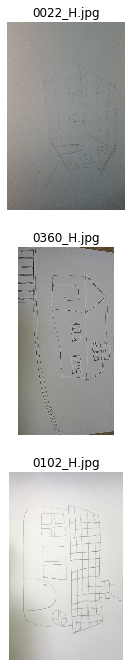

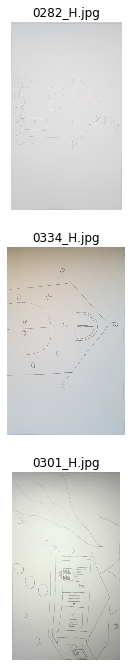

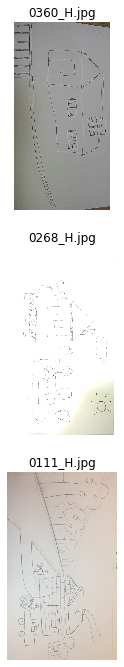

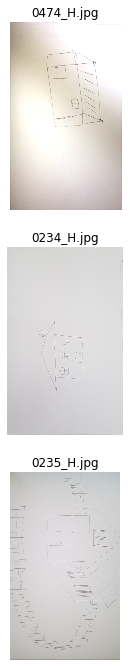

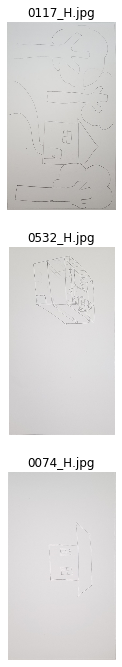

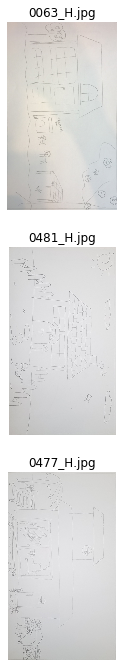

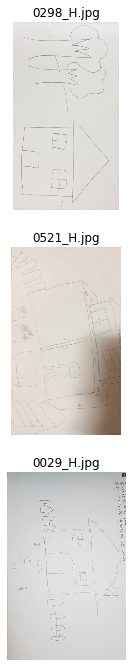

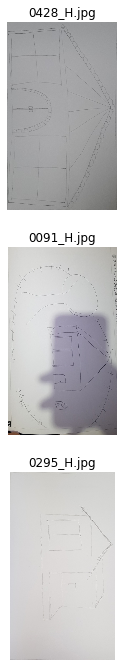

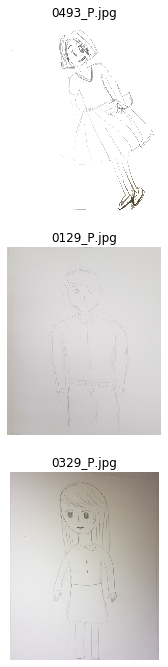

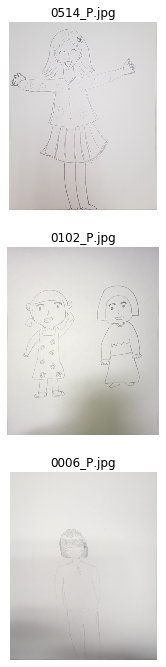

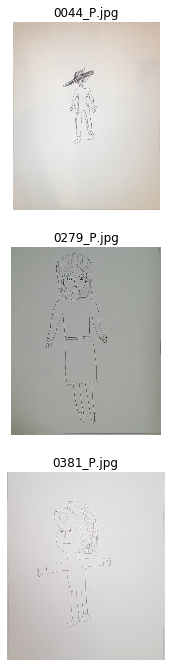

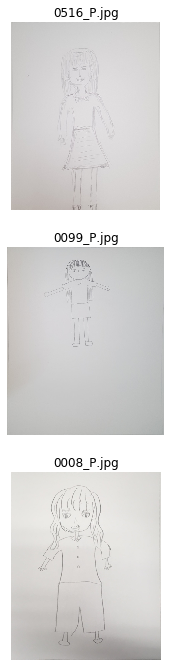

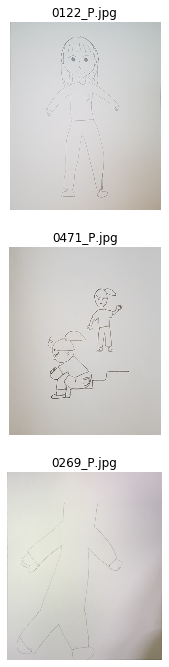

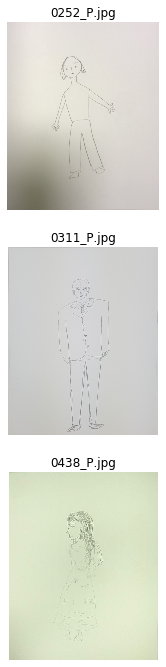

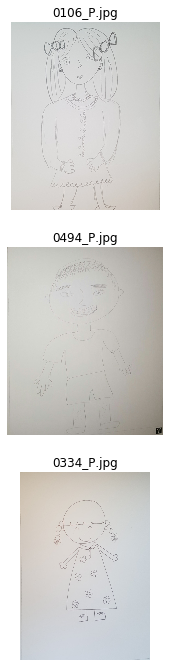

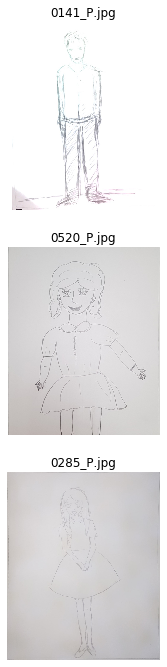

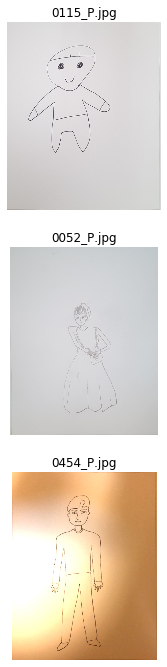

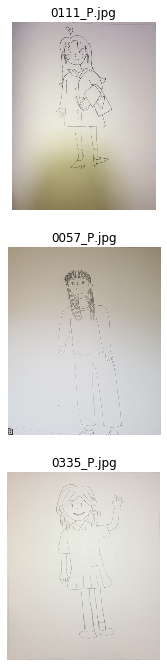

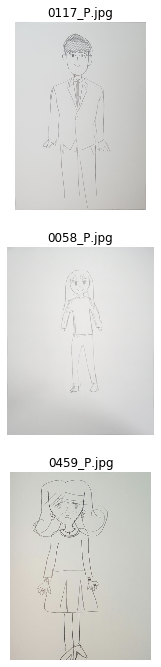

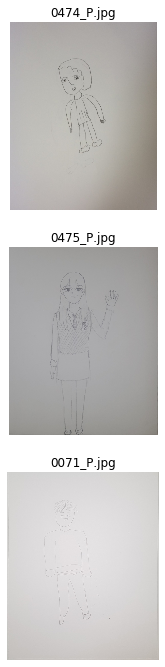

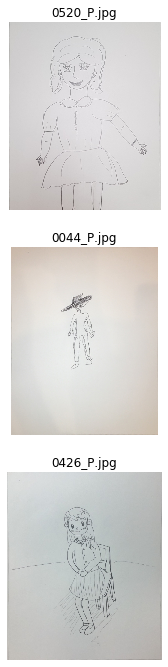

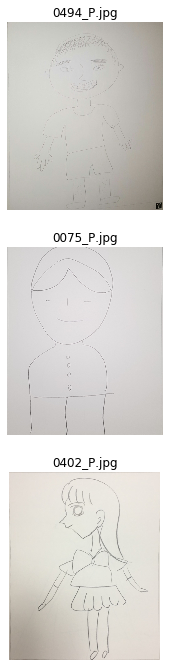

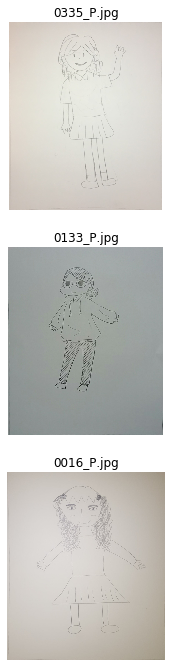

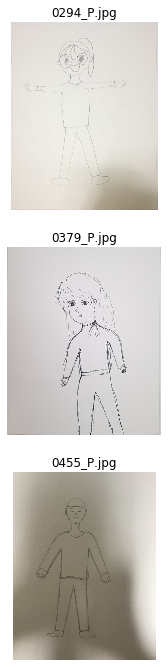

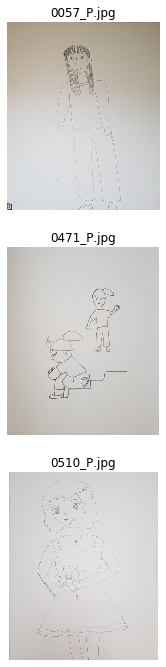

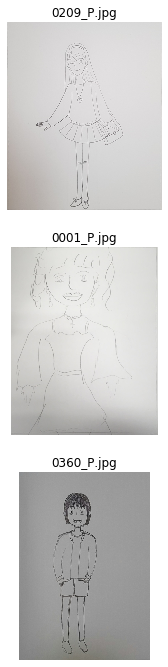

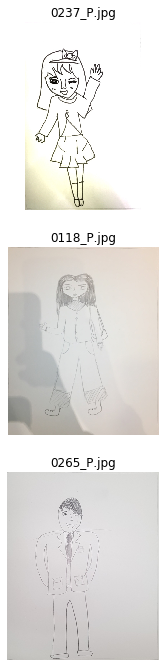

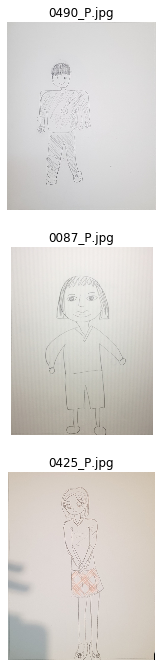

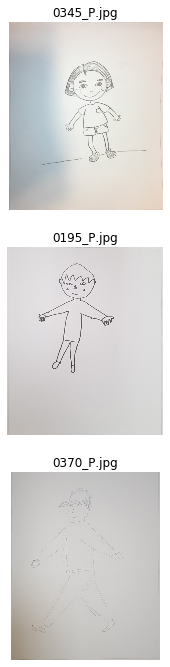

In [7]:
for i in range(len(df_train)):
    tmp_imgs = df_train[i]['data'][100:103]
    plt.figure(figsize=(12,20))
    for num, f_name in enumerate(tmp_imgs):
        img = PIL.Image.open(os.path.join(IMG_PATH, f_name))
        plt.subplot(5, 2, 2*num + 1)
        plt.title(f_name)
        plt.imshow(img)
        plt.axis('off')

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train = []
X_val = []

for i, data in enumerate(feature):
    df_train[i][data] = df_train[i][data].astype('str')
#     df_train[i][data] = to_categorical(df_train[i][data], 2)
    y = df_train[i][data]
    df_train[i] = df_train[i][['data', data]]
    df_test[i] = df_test[i][['data']]

    its = np.arange(df_train[i].shape[0])
    train_idx, val_idx = train_test_split(its, train_size = 0.8, random_state=42, stratify=y)
    
    X_train.append(df_train[i].iloc[train_idx, :])
    X_val.append(df_train[i].iloc[val_idx, :])

    print(data)
    print(X_train[i].shape)
    print(X_val[i].shape)
    print(df_train[i].shape)
    print(df_test[i].shape)
    print("="*20)

문-격자무늬 창
(165, 2)
(42, 2)
(207, 2)
(90, 1)
위치-집-아래
(165, 2)
(42, 2)
(207, 2)
(90, 1)
위치-집-정중앙
(165, 2)
(42, 2)
(207, 2)
(90, 1)
지면선-벽 밑면 있지만 지면 없음
(165, 2)
(42, 2)
(207, 2)
(90, 1)
지붕-그물무늬 음영
(165, 2)
(42, 2)
(207, 2)
(90, 1)
창문-격자무늬
(165, 2)
(42, 2)
(207, 2)
(90, 1)
창문-많다
(165, 2)
(42, 2)
(207, 2)
(90, 1)
창문-창문을 가린 커튼
(165, 2)
(42, 2)
(207, 2)
(90, 1)
크기-사람-작다
(164, 2)
(41, 2)
(205, 2)
(89, 1)
위치-사람-정중앙
(164, 2)
(41, 2)
(205, 2)
(89, 1)
위치-사람-오른쪽
(164, 2)
(41, 2)
(205, 2)
(89, 1)
음영-사람-내부의 진한 음영
(164, 2)
(41, 2)
(205, 2)
(89, 1)
코-작다
(164, 2)
(41, 2)
(205, 2)
(89, 1)
머리카락-윤곽선(검게 표현되지 않은 긴 머리)
(164, 2)
(41, 2)
(205, 2)
(89, 1)
팔-길다
(164, 2)
(41, 2)
(205, 2)
(89, 1)
손-원모양 손, 주먹쥔 손
(164, 2)
(41, 2)
(205, 2)
(89, 1)
다리-넓게 벌림
(164, 2)
(41, 2)
(205, 2)
(89, 1)
다리-앉아있음
(164, 2)
(41, 2)
(205, 2)
(89, 1)
발-발가락 그림
(164, 2)
(41, 2)
(205, 2)
(89, 1)
크기-사람-크다
(164, 2)
(41, 2)
(205, 2)
(89, 1)
위치-사람-왼쪽
(164, 2)
(41, 2)
(205, 2)
(89, 1)
위치-사람-위
(164, 2)
(41, 2)
(205, 2)
(89, 1)
위치-사람-아래
(164, 2)
(41

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [10]:
epochs = 50
batch_size = 30
img_size = (224, 224)
# Define Generator config
train_datagen = ImageDataGenerator(
    horizontal_flip = False, 
    vertical_flip = False,
    rotation_range = 3,
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = []
validation_generator = []
test_generator = []

nb_train_samples = []
nb_validation_samples = []
nb_test_samples = []

for i, num in enumerate(feature):
    nb_train_samples.append(len(X_train[i]))
    nb_validation_samples.append(len(X_val[i]))
    nb_test_samples.append(len(df_test[i]))
    
    
    # Make Generator
    train_generator.append(train_datagen.flow_from_dataframe(
        dataframe=X_train[i], 
        directory=IMG_PATH,
        x_col = 'data',
        y_col = feature[i],
        target_size = img_size,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=batch_size,
        seed=None
    ))

    validation_generator.append(val_datagen.flow_from_dataframe(
        dataframe=X_val[i], 
        directory=IMG_PATH,
        x_col='data',
        y_col=feature[i],
        target_size=img_size,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False
    ))

    test_generator.append(test_datagen.flow_from_dataframe(
        dataframe=df_test[i],
        directory=IMG_PATH,
        x_col='data',
        y_col=None,
        target_size=img_size,
        color_mode='rgb',
        class_mode=None,
        batch_size=batch_size,
        shuffle=False
    ))

Found 165 validated image filenames belonging to 2 classes.
Found 42 validated image filenames belonging to 2 classes.
Found 90 validated image filenames.
Found 165 validated image filenames belonging to 2 classes.
Found 42 validated image filenames belonging to 2 classes.
Found 90 validated image filenames.
Found 165 validated image filenames belonging to 2 classes.
Found 42 validated image filenames belonging to 2 classes.
Found 90 validated image filenames.
Found 165 validated image filenames belonging to 2 classes.
Found 42 validated image filenames belonging to 2 classes.
Found 90 validated image filenames.
Found 165 validated image filenames belonging to 2 classes.
Found 42 validated image filenames belonging to 2 classes.
Found 90 validated image filenames.
Found 165 validated image filenames belonging to 2 classes.
Found 42 validated image filenames belonging to 2 classes.
Found 90 validated image filenames.
Found 165 validated image filenames belonging to 2 classes.
Found 42 v

#이미지 생성 테스트 코드

img = load_img(IMAGE_PATH + 'imagedata/0001_H.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size=1, save_to_dir=IMAGE_PATH + 'house/preview', save_prefix='tri', save_format='png'):
    i += 1
    if i > 10: 
        break

In [11]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, GlobalAveragePooling2D

In [12]:
def MakeMobileModel():
    mobileNetModel = MobileNet(
#         weights='imagenet',
        include_top=False)

    model = Sequential()
    model.add(mobileNetModel)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation='softmax',kernel_initializer='he_normal'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model
model = MakeMobileModel()
model.summary()

C:\Users\AFFINITY\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2050      
Total params: 3,230,914
Trainable params: 3,209,026
Non-trainable params: 21,888
_________________________________________________________________


In [13]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else : 
        return num_samples // batch_size

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

history = []

for i in range(len(feature)):
    model = MakeMobileModel()
    filepath = feature[i] + "_mobile_model_{val_acc:.2f}_{val_loss:.4f}.h5"
    
    ckpt = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
    es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

    callbackList = [ckpt]

    history.append(model.fit_generator(
        train_generator[i],
        steps_per_epoch = get_steps(nb_train_samples[i], batch_size),
        epochs=epochs,
        validation_data = validation_generator[i],
        validation_steps = get_steps(nb_validation_samples[i], batch_size),
        callbacks = callbackList
    ))
    gc.collect()

Epoch 1/50
5/6 [========================>.....] - ETA: 16s - loss: 0.4071 - acc: 0.83 - ETA: 7s - loss: 0.4831 - acc: 0.8333 - ETA: 3s - loss: 0.3438 - acc: 0.866 - ETA: 2s - loss: 0.2896 - acc: 0.885 - ETA: 0s - loss: 0.3191 - acc: 0.8963
Epoch 00001: val_loss improved from inf to 0.26864, saving model to 문-격자무늬 창_mobile_model_0.98_0.2686.h5
6/6 [==============================] - 6s 954ms/step - loss: 0.2962 - acc: 0.9091 - val_loss: 0.2686 - val_acc: 0.9762
Epoch 2/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0077 - acc: 1.000 - ETA: 1s - loss: 0.0567 - acc: 0.966 - ETA: 0s - loss: 0.0559 - acc: 0.973 - ETA: 0s - loss: 0.0743 - acc: 0.971 - ETA: 0s - loss: 0.0702 - acc: 0.9704
Epoch 00002: val_loss improved from 0.26864 to 0.26864, saving model to 문-격자무늬 창_mobile_model_0.98_0.2686.h5
6/6 [==============================] - 4s 666ms/step - loss: 0.0589 - acc: 0.9758 - val_loss: 0.2686 - val_acc: 0.9762
Epoch 3/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0

Epoch 20/50
5/6 [========================>.....] - ETA: 1s - loss: 3.4651e-06 - acc: 1.000 - ETA: 2s - loss: 3.4194e-06 - acc: 1.000 - ETA: 2s - loss: 3.0637e-06 - acc: 1.000 - ETA: 1s - loss: 2.1542e-05 - acc: 1.000 - ETA: 0s - loss: 1.8445e-05 - acc: 1.0000
Epoch 00020: val_loss did not improve from 0.23687
6/6 [==============================] - 5s 822ms/step - loss: 1.8390e-05 - acc: 1.0000 - val_loss: 0.2686 - val_acc: 0.9762
Epoch 21/50
5/6 [========================>.....] - ETA: 1s - loss: 2.2571e-06 - acc: 1.000 - ETA: 1s - loss: 3.0141e-06 - acc: 1.000 - ETA: 1s - loss: 3.2445e-06 - acc: 1.000 - ETA: 1s - loss: 3.8073e-06 - acc: 1.000 - ETA: 0s - loss: 3.5112e-06 - acc: 1.0000
Epoch 00021: val_loss did not improve from 0.23687
6/6 [==============================] - 5s 796ms/step - loss: 4.8931e-06 - acc: 1.0000 - val_loss: 0.2686 - val_acc: 0.9762
Epoch 22/50
5/6 [========================>.....] - ETA: 1s - loss: 1.1727e-05 - acc: 1.000 - ETA: 1s - loss: 7.1399e-06 - acc: 1.000

Epoch 39/50
5/6 [========================>.....] - ETA: 1s - loss: 6.4672e-06 - acc: 1.000 - ETA: 2s - loss: 9.8823e-06 - acc: 1.000 - ETA: 1s - loss: 3.1821e-05 - acc: 1.000 - ETA: 1s - loss: 2.5019e-05 - acc: 1.000 - ETA: 0s - loss: 2.0113e-05 - acc: 1.0000
Epoch 00039: val_loss did not improve from 0.23687
6/6 [==============================] - 4s 694ms/step - loss: 1.7446e-05 - acc: 1.0000 - val_loss: 0.2687 - val_acc: 0.9762
Epoch 40/50
5/6 [========================>.....] - ETA: 0s - loss: 3.8747e-05 - acc: 1.000 - ETA: 1s - loss: 2.1240e-05 - acc: 1.000 - ETA: 1s - loss: 1.5807e-05 - acc: 1.000 - ETA: 0s - loss: 1.2552e-05 - acc: 1.000 - ETA: 0s - loss: 1.0411e-05 - acc: 1.0000
Epoch 00040: val_loss did not improve from 0.23687
6/6 [==============================] - 4s 655ms/step - loss: 8.8187e-06 - acc: 1.0000 - val_loss: 0.2687 - val_acc: 0.9762
Epoch 41/50
5/6 [========================>.....] - ETA: 1s - loss: 7.8604e-06 - acc: 1.000 - ETA: 1s - loss: 1.1451e-05 - acc: 1.000

6/6 [==============================] - 4s 667ms/step - loss: 0.0065 - acc: 1.0000 - val_loss: 1.7406 - val_acc: 0.5000
Epoch 8/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0354 - acc: 0.966 - ETA: 1s - loss: 0.0179 - acc: 0.983 - ETA: 1s - loss: 0.0125 - acc: 0.988 - ETA: 0s - loss: 0.0400 - acc: 0.981 - ETA: 0s - loss: 0.0327 - acc: 0.9852
Epoch 00008: val_loss did not improve from 0.73651
6/6 [==============================] - 4s 677ms/step - loss: 0.0326 - acc: 0.9818 - val_loss: 1.4457 - val_acc: 0.5476
Epoch 9/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0082 - acc: 1.000 - ETA: 1s - loss: 0.1582 - acc: 0.977 - ETA: 1s - loss: 0.1441 - acc: 0.973 - ETA: 0s - loss: 0.1081 - acc: 0.981 - ETA: 0s - loss: 0.0886 - acc: 0.9852
Epoch 00009: val_loss did not improve from 0.73651
6/6 [==============================] - 4s 696ms/step - loss: 0.0709 - acc: 0.9879 - val_loss: 1.7109 - val_acc: 0.5476
Epoch 10/50
5/6 [========================>.....] - ETA: 1s - lo

5/6 [========================>.....] - ETA: 1s - loss: 6.0416e-04 - acc: 1.000 - ETA: 1s - loss: 0.0072 - acc: 1.0000    - ETA: 1s - loss: 0.0049 - acc: 1.000 - ETA: 1s - loss: 0.0037 - acc: 1.000 - ETA: 0s - loss: 0.0030 - acc: 1.0000
Epoch 00027: val_loss did not improve from 0.73651
6/6 [==============================] - 4s 648ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.9141 - val_acc: 0.7857
Epoch 28/50
5/6 [========================>.....] - ETA: 1s - loss: 1.0561e-04 - acc: 1.000 - ETA: 1s - loss: 0.0120 - acc: 1.0000    - ETA: 1s - loss: 0.0080 - acc: 1.000 - ETA: 0s - loss: 0.0064 - acc: 1.000 - ETA: 0s - loss: 0.0053 - acc: 1.0000
Epoch 00028: val_loss did not improve from 0.73651
6/6 [==============================] - 4s 672ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 1.5130 - val_acc: 0.8095
Epoch 29/50
5/6 [========================>.....] - ETA: 1s - loss: 5.1978e-05 - acc: 1.000 - ETA: 1s - loss: 6.8656e-05 - acc: 1.000 - ETA: 1s - loss: 1.0014e-04 - acc: 1.000 -

5/6 [========================>.....] - ETA: 1s - loss: 5.2842e-04 - acc: 1.000 - ETA: 1s - loss: 3.0046e-04 - acc: 1.000 - ETA: 1s - loss: 2.4075e-04 - acc: 1.000 - ETA: 1s - loss: 1.8806e-04 - acc: 1.000 - ETA: 0s - loss: 1.5754e-04 - acc: 1.0000
Epoch 00046: val_loss did not improve from 0.73651
6/6 [==============================] - 4s 659ms/step - loss: 1.3461e-04 - acc: 1.0000 - val_loss: 1.5049 - val_acc: 0.8095
Epoch 47/50
5/6 [========================>.....] - ETA: 1s - loss: 5.4478e-05 - acc: 1.000 - ETA: 2s - loss: 6.8668e-05 - acc: 1.000 - ETA: 1s - loss: 5.5112e-05 - acc: 1.000 - ETA: 1s - loss: 8.8377e-05 - acc: 1.000 - ETA: 0s - loss: 1.8395e-04 - acc: 1.0000
Epoch 00047: val_loss did not improve from 0.73651
6/6 [==============================] - 4s 705ms/step - loss: 1.5930e-04 - acc: 1.0000 - val_loss: 1.5034 - val_acc: 0.8095
Epoch 48/50
5/6 [========================>.....] - ETA: 1s - loss: 2.0280e-04 - acc: 1.000 - ETA: 1s - loss: 1.6192e-04 - acc: 1.000 - ETA: 1s -

5/6 [========================>.....] - ETA: 1s - loss: 8.5415e-05 - acc: 1.000 - ETA: 1s - loss: 0.0011 - acc: 1.0000    - ETA: 1s - loss: 0.0413 - acc: 0.986 - ETA: 1s - loss: 0.0313 - acc: 0.990 - ETA: 0s - loss: 0.0290 - acc: 0.9926
Epoch 00015: val_loss did not improve from 0.30224
6/6 [==============================] - 4s 714ms/step - loss: 0.0246 - acc: 0.9939 - val_loss: 0.5373 - val_acc: 0.9524
Epoch 16/50
5/6 [========================>.....] - ETA: 1s - loss: 8.9351e-04 - acc: 1.000 - ETA: 1s - loss: 6.0436e-04 - acc: 1.000 - ETA: 1s - loss: 4.4086e-04 - acc: 1.000 - ETA: 1s - loss: 0.0135 - acc: 0.9917    - ETA: 0s - loss: 0.0109 - acc: 0.9926
Epoch 00016: val_loss did not improve from 0.30224
6/6 [==============================] - 4s 687ms/step - loss: 0.0094 - acc: 0.9939 - val_loss: 0.5373 - val_acc: 0.9524
Epoch 17/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0015 - acc: 1.000 - ETA: 1s - loss: 0.0024 - acc: 1.000 - ETA: 1s - loss: 0.0017 - acc: 1.000 - ETA

5/6 [========================>.....] - ETA: 1s - loss: 2.7551e-05 - acc: 1.000 - ETA: 1s - loss: 1.5293e-05 - acc: 1.000 - ETA: 1s - loss: 2.6143e-05 - acc: 1.000 - ETA: 1s - loss: 2.3875e-05 - acc: 1.000 - ETA: 0s - loss: 1.5328e-04 - acc: 1.0000
Epoch 00034: val_loss did not improve from 0.30224
6/6 [==============================] - 4s 652ms/step - loss: 1.3062e-04 - acc: 1.0000 - val_loss: 0.5373 - val_acc: 0.9524
Epoch 35/50
5/6 [========================>.....] - ETA: 1s - loss: 1.1418e-04 - acc: 1.000 - ETA: 1s - loss: 5.7290e-05 - acc: 1.000 - ETA: 1s - loss: 3.9958e-05 - acc: 1.000 - ETA: 1s - loss: 3.4442e-05 - acc: 1.000 - ETA: 0s - loss: 3.3291e-05 - acc: 1.0000
Epoch 00035: val_loss did not improve from 0.30224
6/6 [==============================] - 4s 720ms/step - loss: 2.8154e-05 - acc: 1.0000 - val_loss: 0.5373 - val_acc: 0.9524
Epoch 36/50
5/6 [========================>.....] - ETA: 1s - loss: 1.4694e-04 - acc: 1.000 - ETA: 1s - loss: 1.0375e-04 - acc: 1.000 - ETA: 1s -

Epoch 3/50
5/6 [========================>.....] - ETA: 1s - loss: 0.3489 - acc: 0.800 - ETA: 1s - loss: 0.3348 - acc: 0.911 - ETA: 1s - loss: 0.2515 - acc: 0.933 - ETA: 0s - loss: 0.2085 - acc: 0.942 - ETA: 0s - loss: 0.2517 - acc: 0.9333
Epoch 00003: val_loss did not improve from 1.65376
6/6 [==============================] - 4s 663ms/step - loss: 0.3187 - acc: 0.9212 - val_loss: 5.7757 - val_acc: 0.6667
Epoch 4/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0051 - acc: 1.000 - ETA: 1s - loss: 0.0112 - acc: 1.000 - ETA: 1s - loss: 0.1328 - acc: 0.966 - ETA: 1s - loss: 0.1522 - acc: 0.966 - ETA: 0s - loss: 0.1229 - acc: 0.9733
Epoch 00004: val_loss did not improve from 1.65376
6/6 [==============================] - 4s 664ms/step - loss: 0.1093 - acc: 0.9758 - val_loss: 5.7757 - val_acc: 0.6667
Epoch 5/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0224 - acc: 1.000 - ETA: 1s - loss: 0.0407 - acc: 1.000 - ETA: 1s - loss: 0.0431 - acc: 0.986 - ETA: 0s - loss: 0.

Epoch 23/50
5/6 [========================>.....] - ETA: 1s - loss: 1.1074e-04 - acc: 1.000 - ETA: 1s - loss: 5.8696e-05 - acc: 1.000 - ETA: 1s - loss: 6.2606e-04 - acc: 1.000 - ETA: 0s - loss: 0.0305 - acc: 0.9810    - ETA: 0s - loss: 0.0246 - acc: 0.9852
Epoch 00023: val_loss did not improve from 1.65376
6/6 [==============================] - 4s 657ms/step - loss: 0.0208 - acc: 0.9879 - val_loss: 4.7110 - val_acc: 0.6905
Epoch 24/50
5/6 [========================>.....] - ETA: 1s - loss: 1.2291e-04 - acc: 1.000 - ETA: 2s - loss: 8.8201e-05 - acc: 1.000 - ETA: 1s - loss: 2.6716e-04 - acc: 1.000 - ETA: 1s - loss: 2.8594e-04 - acc: 1.000 - ETA: 0s - loss: 2.3253e-04 - acc: 1.0000
Epoch 00024: val_loss did not improve from 1.65376
6/6 [==============================] - 4s 720ms/step - loss: 5.2594e-04 - acc: 1.0000 - val_loss: 4.5021 - val_acc: 0.7143
Epoch 25/50
5/6 [========================>.....] - ETA: 1s - loss: 2.1933e-04 - acc: 1.000 - ETA: 1s - loss: 8.3901e-04 - acc: 1.000 - ETA: 

5/6 [========================>.....] - ETA: 1s - loss: 3.7949e-06 - acc: 1.000 - ETA: 1s - loss: 5.6993e-05 - acc: 1.000 - ETA: 1s - loss: 4.1222e-05 - acc: 1.000 - ETA: 0s - loss: 3.6387e-05 - acc: 1.000 - ETA: 0s - loss: 4.1013e-05 - acc: 1.0000
Epoch 00042: val_loss did not improve from 1.65376
6/6 [==============================] - 4s 673ms/step - loss: 8.8027e-05 - acc: 1.0000 - val_loss: 2.8987 - val_acc: 0.7619
Epoch 43/50
5/6 [========================>.....] - ETA: 1s - loss: 7.5282e-06 - acc: 1.000 - ETA: 1s - loss: 5.3139e-05 - acc: 1.000 - ETA: 1s - loss: 5.6355e-05 - acc: 1.000 - ETA: 0s - loss: 5.1879e-05 - acc: 1.000 - ETA: 0s - loss: 1.7375e-04 - acc: 1.0000
Epoch 00043: val_loss did not improve from 1.65376
6/6 [==============================] - 4s 693ms/step - loss: 1.5155e-04 - acc: 1.0000 - val_loss: 2.8250 - val_acc: 0.7619
Epoch 44/50
5/6 [========================>.....] - ETA: 1s - loss: 2.3189e-05 - acc: 1.000 - ETA: 1s - loss: 2.0706e-05 - acc: 1.000 - ETA: 1s -

Epoch 11/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0048 - acc: 1.000 - ETA: 1s - loss: 0.0066 - acc: 1.000 - ETA: 1s - loss: 0.0476 - acc: 0.986 - ETA: 1s - loss: 0.0485 - acc: 0.981 - ETA: 0s - loss: 0.1196 - acc: 0.9704
Epoch 00011: val_loss improved from 0.53707 to 0.49930, saving model to 지붕-그물무늬 음영_mobile_model_0.81_0.4993.h5
6/6 [==============================] - 4s 732ms/step - loss: 0.1251 - acc: 0.9697 - val_loss: 0.4993 - val_acc: 0.8095
Epoch 12/50
5/6 [========================>.....] - ETA: 1s - loss: 0.1138 - acc: 0.966 - ETA: 1s - loss: 0.0621 - acc: 0.983 - ETA: 1s - loss: 0.0451 - acc: 0.988 - ETA: 0s - loss: 0.0520 - acc: 0.990 - ETA: 0s - loss: 0.1417 - acc: 0.9556
Epoch 00012: val_loss did not improve from 0.49930
6/6 [==============================] - 4s 678ms/step - loss: 0.1360 - acc: 0.9515 - val_loss: 2.0123 - val_acc: 0.7857
Epoch 13/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0773 - acc: 1.000 - ETA: 1s - loss: 0.0480 - acc: 1

Epoch 00030: val_loss did not improve from 0.49930
6/6 [==============================] - 4s 702ms/step - loss: 0.0055 - acc: 0.9939 - val_loss: 1.8333 - val_acc: 0.7143
Epoch 31/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0014 - acc: 1.000 - ETA: 2s - loss: 7.2014e-04 - acc: 1.000 - ETA: 1s - loss: 8.0290e-04 - acc: 1.000 - ETA: 1s - loss: 6.7098e-04 - acc: 1.000 - ETA: 0s - loss: 5.5886e-04 - acc: 1.0000
Epoch 00031: val_loss did not improve from 0.49930
6/6 [==============================] - 4s 744ms/step - loss: 7.3610e-04 - acc: 1.0000 - val_loss: 1.9150 - val_acc: 0.7381
Epoch 32/50
5/6 [========================>.....] - ETA: 1s - loss: 5.0173e-04 - acc: 1.000 - ETA: 1s - loss: 4.4991e-04 - acc: 1.000 - ETA: 1s - loss: 0.0300 - acc: 0.9867    - ETA: 0s - loss: 0.0226 - acc: 0.990 - ETA: 0s - loss: 0.0185 - acc: 0.9926
Epoch 00032: val_loss did not improve from 0.49930
6/6 [==============================] - 4s 722ms/step - loss: 0.0157 - acc: 0.9939 - val_loss: 1.7

Epoch 50/50
5/6 [========================>.....] - ETA: 1s - loss: 2.9825e-04 - acc: 1.000 - ETA: 1s - loss: 1.5636e-04 - acc: 1.000 - ETA: 1s - loss: 1.3452e-04 - acc: 1.000 - ETA: 1s - loss: 1.0240e-04 - acc: 1.000 - ETA: 0s - loss: 1.4843e-04 - acc: 1.0000
Epoch 00050: val_loss did not improve from 0.49930
6/6 [==============================] - 5s 764ms/step - loss: 1.3672e-04 - acc: 1.0000 - val_loss: 1.3835 - val_acc: 0.7857
Epoch 1/50
5/6 [========================>.....] - ETA: 6s - loss: 0.9847 - acc: 0.566 - ETA: 3s - loss: 1.1907 - acc: 0.488 - ETA: 2s - loss: 1.2580 - acc: 0.480 - ETA: 1s - loss: 1.2708 - acc: 0.495 - ETA: 0s - loss: 1.2612 - acc: 0.5111
Epoch 00001: val_loss improved from inf to 3.21881, saving model to 창문-격자무늬_mobile_model_0.62_3.2188.h5
6/6 [==============================] - 6s 954ms/step - loss: 1.2676 - acc: 0.5394 - val_loss: 3.2188 - val_acc: 0.6190
Epoch 2/50
5/6 [========================>.....] - ETA: 1s - loss: 0.4270 - acc: 0.800 - ETA: 1s - loss: 

Epoch 00019: val_loss did not improve from 1.94407
6/6 [==============================] - 4s 685ms/step - loss: 0.0693 - acc: 0.9758 - val_loss: 4.2518 - val_acc: 0.6429
Epoch 20/50
5/6 [========================>.....] - ETA: 1s - loss: 4.2369e-04 - acc: 1.000 - ETA: 1s - loss: 0.0054 - acc: 1.0000    - ETA: 1s - loss: 0.0040 - acc: 1.000 - ETA: 1s - loss: 0.0427 - acc: 0.983 - ETA: 0s - loss: 0.0368 - acc: 0.9852
Epoch 00020: val_loss did not improve from 1.94407
6/6 [==============================] - 4s 711ms/step - loss: 0.0722 - acc: 0.9818 - val_loss: 3.6325 - val_acc: 0.6190
Epoch 21/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0543 - acc: 0.966 - ETA: 1s - loss: 0.0296 - acc: 0.983 - ETA: 1s - loss: 0.0200 - acc: 0.988 - ETA: 0s - loss: 0.0223 - acc: 0.990 - ETA: 0s - loss: 0.0454 - acc: 0.9852
Epoch 00021: val_loss did not improve from 1.94407
6/6 [==============================] - 4s 718ms/step - loss: 0.0381 - acc: 0.9879 - val_loss: 2.1895 - val_acc: 0.6905
Ep

5/6 [========================>.....] - ETA: 1s - loss: 0.0218 - acc: 1.000 - ETA: 1s - loss: 0.0145 - acc: 1.000 - ETA: 1s - loss: 0.0098 - acc: 1.000 - ETA: 1s - loss: 0.0077 - acc: 1.000 - ETA: 0s - loss: 0.0063 - acc: 1.0000
Epoch 00039: val_loss did not improve from 1.84576
6/6 [==============================] - 4s 660ms/step - loss: 0.0100 - acc: 1.0000 - val_loss: 3.1115 - val_acc: 0.6667
Epoch 40/50
5/6 [========================>.....] - ETA: 1s - loss: 1.9658e-04 - acc: 1.000 - ETA: 2s - loss: 0.0107 - acc: 1.0000    - ETA: 1s - loss: 0.0072 - acc: 1.000 - ETA: 1s - loss: 0.0560 - acc: 0.990 - ETA: 0s - loss: 0.0452 - acc: 0.9926
Epoch 00040: val_loss did not improve from 1.84576
6/6 [==============================] - 4s 725ms/step - loss: 0.0356 - acc: 0.9939 - val_loss: 5.2306 - val_acc: 0.6429
Epoch 41/50
5/6 [========================>.....] - ETA: 1s - loss: 6.7646e-05 - acc: 1.000 - ETA: 1s - loss: 0.0023 - acc: 1.0000    - ETA: 1s - loss: 0.0019 - acc: 1.000 - ETA: 0s - l

Epoch 00008: val_loss did not improve from 3.55532
6/6 [==============================] - 4s 688ms/step - loss: 0.0514 - acc: 0.9818 - val_loss: 3.8720 - val_acc: 0.6905
Epoch 9/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0606 - acc: 0.933 - ETA: 1s - loss: 0.1448 - acc: 0.933 - ETA: 1s - loss: 0.1213 - acc: 0.946 - ETA: 0s - loss: 0.0914 - acc: 0.961 - ETA: 0s - loss: 0.0818 - acc: 0.9630
Epoch 00009: val_loss did not improve from 3.55532
6/6 [==============================] - 4s 715ms/step - loss: 0.0920 - acc: 0.9576 - val_loss: 4.2982 - val_acc: 0.6905
Epoch 10/50
5/6 [========================>.....] - ETA: 1s - loss: 6.6721e-04 - acc: 1.000 - ETA: 1s - loss: 0.0097 - acc: 1.0000    - ETA: 1s - loss: 0.0076 - acc: 1.000 - ETA: 0s - loss: 0.1191 - acc: 0.971 - ETA: 0s - loss: 0.1004 - acc: 0.9778
Epoch 00010: val_loss did not improve from 3.55532
6/6 [==============================] - 4s 692ms/step - loss: 0.0851 - acc: 0.9818 - val_loss: 4.2982 - val_acc: 0.6905
Epo

5/6 [========================>.....] - ETA: 1s - loss: 0.0014 - acc: 1.000 - ETA: 1s - loss: 7.2627e-04 - acc: 1.000 - ETA: 1s - loss: 4.9552e-04 - acc: 1.000 - ETA: 1s - loss: 7.8922e-04 - acc: 1.000 - ETA: 0s - loss: 0.0029 - acc: 1.0000    
Epoch 00028: val_loss did not improve from 2.19303
6/6 [==============================] - 5s 755ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 2.7142 - val_acc: 0.7143
Epoch 29/50
5/6 [========================>.....] - ETA: 1s - loss: 7.4965e-06 - acc: 1.000 - ETA: 1s - loss: 6.6809e-06 - acc: 1.000 - ETA: 1s - loss: 9.2938e-06 - acc: 1.000 - ETA: 1s - loss: 1.8792e-05 - acc: 1.000 - ETA: 0s - loss: 1.5519e-05 - acc: 1.0000
Epoch 00029: val_loss did not improve from 2.19303
6/6 [==============================] - 4s 730ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.6598 - val_acc: 0.7381
Epoch 30/50
5/6 [========================>.....] - ETA: 1s - loss: 2.0961e-06 - acc: 1.000 - ETA: 2s - loss: 3.5972e-05 - acc: 1.000 - ETA: 1s - loss: 2.571

5/6 [========================>.....] - ETA: 1s - loss: 3.8938e-04 - acc: 1.000 - ETA: 1s - loss: 2.5619e-04 - acc: 1.000 - ETA: 1s - loss: 0.0171 - acc: 0.9867    - ETA: 1s - loss: 0.0263 - acc: 0.981 - ETA: 0s - loss: 0.0261 - acc: 0.9778
Epoch 00047: val_loss did not improve from 1.44665
6/6 [==============================] - 4s 735ms/step - loss: 0.0235 - acc: 0.9818 - val_loss: 2.7321 - val_acc: 0.6190
Epoch 48/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0327 - acc: 0.966 - ETA: 1s - loss: 0.0174 - acc: 0.983 - ETA: 1s - loss: 0.0116 - acc: 0.988 - ETA: 0s - loss: 0.0087 - acc: 0.990 - ETA: 0s - loss: 0.0070 - acc: 0.9926
Epoch 00048: val_loss did not improve from 1.44665
6/6 [==============================] - 4s 722ms/step - loss: 0.0291 - acc: 0.9879 - val_loss: 2.6573 - val_acc: 0.7143
Epoch 49/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0084 - acc: 1.000 - ETA: 1s - loss: 0.0371 - acc: 0.955 - ETA: 1s - loss: 0.0247 - acc: 0.973 - ETA: 1s - loss:

5/6 [========================>.....] - ETA: 1s - loss: 1.7321e-04 - acc: 1.000 - ETA: 2s - loss: 1.0979e-04 - acc: 1.000 - ETA: 1s - loss: 1.1841e-04 - acc: 1.000 - ETA: 1s - loss: 1.2004e-04 - acc: 1.000 - ETA: 0s - loss: 1.1120e-04 - acc: 1.0000
Epoch 00015: val_loss did not improve from 0.10450
6/6 [==============================] - 4s 737ms/step - loss: 1.0135e-04 - acc: 1.0000 - val_loss: 0.1558 - val_acc: 0.8810
Epoch 16/50
5/6 [========================>.....] - ETA: 1s - loss: 3.5459e-04 - acc: 1.000 - ETA: 1s - loss: 3.1039e-04 - acc: 1.000 - ETA: 1s - loss: 5.7581e-04 - acc: 1.000 - ETA: 0s - loss: 7.0253e-04 - acc: 1.000 - ETA: 0s - loss: 5.6922e-04 - acc: 1.0000
Epoch 00016: val_loss did not improve from 0.10450
6/6 [==============================] - 5s 756ms/step - loss: 4.7099e-04 - acc: 1.0000 - val_loss: 0.1652 - val_acc: 0.8571
Epoch 17/50
5/6 [========================>.....] - ETA: 2s - loss: 5.4485e-05 - acc: 1.000 - ETA: 1s - loss: 7.6766e-05 - acc: 1.000 - ETA: 1s -

5/6 [========================>.....] - ETA: 1s - loss: 3.7271e-05 - acc: 1.000 - ETA: 2s - loss: 2.4348e-05 - acc: 1.000 - ETA: 1s - loss: 2.3215e-05 - acc: 1.000 - ETA: 1s - loss: 2.2298e-05 - acc: 1.000 - ETA: 0s - loss: 1.9727e-05 - acc: 1.0000
Epoch 00033: val_loss did not improve from 0.07601
6/6 [==============================] - 5s 798ms/step - loss: 1.2839e-04 - acc: 1.0000 - val_loss: 0.1176 - val_acc: 0.9286
Epoch 34/50
5/6 [========================>.....] - ETA: 1s - loss: 2.8378e-05 - acc: 1.000 - ETA: 1s - loss: 3.8231e-05 - acc: 1.000 - ETA: 1s - loss: 4.1011e-05 - acc: 1.000 - ETA: 1s - loss: 4.2769e-05 - acc: 1.000 - ETA: 0s - loss: 4.5830e-05 - acc: 1.0000
Epoch 00034: val_loss did not improve from 0.07601
6/6 [==============================] - 5s 827ms/step - loss: 4.4275e-05 - acc: 1.0000 - val_loss: 0.1262 - val_acc: 0.9286
Epoch 35/50
5/6 [========================>.....] - ETA: 1s - loss: 1.1981e-05 - acc: 1.000 - ETA: 1s - loss: 1.6626e-05 - acc: 1.000 - ETA: 1s -

Epoch 2/50
5/6 [========================>.....] - ETA: 1s - loss: 0.1648 - acc: 0.857 - ETA: 1s - loss: 0.1419 - acc: 0.931 - ETA: 1s - loss: 0.1097 - acc: 0.959 - ETA: 1s - loss: 0.0903 - acc: 0.971 - ETA: 0s - loss: 0.0755 - acc: 0.9776
Epoch 00002: val_loss did not improve from 0.34850
6/6 [==============================] - 5s 772ms/step - loss: 0.0908 - acc: 0.9634 - val_loss: 1.1971 - val_acc: 0.8780
Epoch 3/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0082 - acc: 1.000 - ETA: 2s - loss: 0.0081 - acc: 1.000 - ETA: 1s - loss: 0.0917 - acc: 0.977 - ETA: 1s - loss: 0.0795 - acc: 0.975 - ETA: 0s - loss: 0.0639 - acc: 0.9776
Epoch 00003: val_loss did not improve from 0.34850
6/6 [==============================] - 5s 790ms/step - loss: 0.0592 - acc: 0.9817 - val_loss: 1.1301 - val_acc: 0.8780
Epoch 4/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0715 - acc: 0.966 - ETA: 2s - loss: 0.0642 - acc: 0.966 - ETA: 1s - loss: 0.1324 - acc: 0.955 - ETA: 1s - loss: 0.

5/6 [========================>.....] - ETA: 1s - loss: 1.1417e-04 - acc: 1.000 - ETA: 1s - loss: 6.9089e-05 - acc: 1.000 - ETA: 1s - loss: 6.2996e-05 - acc: 1.000 - ETA: 1s - loss: 6.8108e-05 - acc: 1.000 - ETA: 0s - loss: 8.2148e-05 - acc: 1.0000
Epoch 00021: val_loss did not improve from 0.33447
6/6 [==============================] - 4s 749ms/step - loss: 2.3679e-04 - acc: 1.0000 - val_loss: 0.7531 - val_acc: 0.8780
Epoch 22/50
5/6 [========================>.....] - ETA: 2s - loss: 2.1824e-04 - acc: 1.000 - ETA: 2s - loss: 1.1299e-04 - acc: 1.000 - ETA: 1s - loss: 1.0583e-04 - acc: 1.000 - ETA: 1s - loss: 1.0047e-04 - acc: 1.000 - ETA: 0s - loss: 9.0032e-05 - acc: 1.0000
Epoch 00022: val_loss did not improve from 0.33447
6/6 [==============================] - 5s 781ms/step - loss: 7.8156e-05 - acc: 1.0000 - val_loss: 0.7776 - val_acc: 0.8780
Epoch 23/50
5/6 [========================>.....] - ETA: 1s - loss: 1.2769e-04 - acc: 1.000 - ETA: 2s - loss: 8.3934e-05 - acc: 1.000 - ETA: 1s -

Epoch 40/50
5/6 [========================>.....] - ETA: 1s - loss: 1.1000e-05 - acc: 1.000 - ETA: 2s - loss: 7.5078e-06 - acc: 1.000 - ETA: 1s - loss: 5.8610e-06 - acc: 1.000 - ETA: 1s - loss: 5.2456e-06 - acc: 1.000 - ETA: 0s - loss: 1.9909e-05 - acc: 1.0000
Epoch 00040: val_loss did not improve from 0.33447
6/6 [==============================] - 5s 773ms/step - loss: 1.7079e-05 - acc: 1.0000 - val_loss: 0.7042 - val_acc: 0.9024
Epoch 41/50
5/6 [========================>.....] - ETA: 1s - loss: 1.0106e-05 - acc: 1.000 - ETA: 1s - loss: 5.8893e-06 - acc: 1.000 - ETA: 1s - loss: 1.3231e-05 - acc: 1.000 - ETA: 1s - loss: 1.1166e-05 - acc: 1.000 - ETA: 0s - loss: 4.6244e-05 - acc: 1.0000
Epoch 00041: val_loss did not improve from 0.33447
6/6 [==============================] - 4s 747ms/step - loss: 3.9232e-05 - acc: 1.0000 - val_loss: 0.6782 - val_acc: 0.9268
Epoch 42/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0062 - acc: 1.000 - ETA: 1s - loss: 0.0031 - acc: 1.000 - ETA: 

5/6 [========================>.....] - ETA: 1s - loss: 4.2820e-04 - acc: 1.000 - ETA: 2s - loss: 2.2408e-04 - acc: 1.000 - ETA: 1s - loss: 5.3743e-04 - acc: 1.000 - ETA: 0s - loss: 4.9818e-04 - acc: 1.000 - ETA: 0s - loss: 5.1181e-04 - acc: 1.0000
Epoch 00009: val_loss did not improve from 0.27756
6/6 [==============================] - 4s 750ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.3958 - val_acc: 0.9512
Epoch 10/50
5/6 [========================>.....] - ETA: 1s - loss: 6.0610e-05 - acc: 1.000 - ETA: 1s - loss: 1.8837e-04 - acc: 1.000 - ETA: 1s - loss: 1.6743e-04 - acc: 1.000 - ETA: 0s - loss: 2.1088e-04 - acc: 1.000 - ETA: 0s - loss: 5.9078e-04 - acc: 1.0000
Epoch 00010: val_loss did not improve from 0.27756
6/6 [==============================] - 4s 717ms/step - loss: 5.2678e-04 - acc: 1.0000 - val_loss: 0.4412 - val_acc: 0.9512
Epoch 11/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0019 - acc: 1.000 - ETA: 2s - loss: 0.0014 - acc: 1.000 - ETA: 1s - loss: 9.850

Epoch 28/50
5/6 [========================>.....] - ETA: 1s - loss: 1.6213e-05 - acc: 1.000 - ETA: 1s - loss: 4.0586e-05 - acc: 1.000 - ETA: 1s - loss: 5.6480e-05 - acc: 1.000 - ETA: 1s - loss: 4.5078e-05 - acc: 1.000 - ETA: 0s - loss: 3.7681e-05 - acc: 1.0000
Epoch 00028: val_loss did not improve from 0.27756
6/6 [==============================] - 4s 745ms/step - loss: 3.1981e-05 - acc: 1.0000 - val_loss: 0.5373 - val_acc: 0.9512
Epoch 29/50
5/6 [========================>.....] - ETA: 1s - loss: 9.6826e-06 - acc: 1.000 - ETA: 1s - loss: 7.8003e-06 - acc: 1.000 - ETA: 1s - loss: 9.6216e-06 - acc: 1.000 - ETA: 0s - loss: 1.7693e-05 - acc: 1.000 - ETA: 0s - loss: 1.9356e-05 - acc: 1.0000
Epoch 00029: val_loss did not improve from 0.27756
6/6 [==============================] - 4s 749ms/step - loss: 1.6480e-05 - acc: 1.0000 - val_loss: 0.5373 - val_acc: 0.9512
Epoch 30/50
5/6 [========================>.....] - ETA: 1s - loss: 2.4704e-05 - acc: 1.000 - ETA: 1s - loss: 1.3352e-05 - acc: 1.000

Epoch 47/50
5/6 [========================>.....] - ETA: 1s - loss: 4.0624e-05 - acc: 1.000 - ETA: 1s - loss: 2.0708e-05 - acc: 1.000 - ETA: 1s - loss: 2.6657e-04 - acc: 1.000 - ETA: 1s - loss: 2.0066e-04 - acc: 1.000 - ETA: 0s - loss: 1.6078e-04 - acc: 1.0000
Epoch 00047: val_loss did not improve from 0.27756
6/6 [==============================] - 4s 745ms/step - loss: 1.3607e-04 - acc: 1.0000 - val_loss: 0.5143 - val_acc: 0.9512
Epoch 48/50
5/6 [========================>.....] - ETA: 1s - loss: 4.4197e-05 - acc: 1.000 - ETA: 1s - loss: 2.2281e-05 - acc: 1.000 - ETA: 1s - loss: 1.7195e-05 - acc: 1.000 - ETA: 1s - loss: 1.3867e-05 - acc: 1.000 - ETA: 0s - loss: 1.1743e-05 - acc: 1.0000
Epoch 00048: val_loss did not improve from 0.27756
6/6 [==============================] - 4s 718ms/step - loss: 1.0098e-05 - acc: 1.0000 - val_loss: 0.5075 - val_acc: 0.9512
Epoch 49/50
5/6 [========================>.....] - ETA: 1s - loss: 3.0697e-06 - acc: 1.000 - ETA: 2s - loss: 3.0707e-06 - acc: 1.000

6/6 [==============================] - 4s 742ms/step - loss: 0.0058 - acc: 0.9939 - val_loss: 3.7310 - val_acc: 0.2439
Epoch 16/50
5/6 [========================>.....] - ETA: 1s - loss: 2.8035e-04 - acc: 1.000 - ETA: 1s - loss: 1.7064e-04 - acc: 1.000 - ETA: 1s - loss: 1.4489e-04 - acc: 1.000 - ETA: 1s - loss: 1.4894e-04 - acc: 1.000 - ETA: 0s - loss: 2.0444e-04 - acc: 1.0000
Epoch 00016: val_loss did not improve from 0.17612
6/6 [==============================] - 4s 707ms/step - loss: 2.1696e-04 - acc: 1.0000 - val_loss: 5.5105 - val_acc: 0.1707
Epoch 17/50
5/6 [========================>.....] - ETA: 1s - loss: 1.3899e-04 - acc: 1.000 - ETA: 2s - loss: 0.0122 - acc: 0.9833    - ETA: 1s - loss: 0.0082 - acc: 0.988 - ETA: 1s - loss: 0.0062 - acc: 0.990 - ETA: 0s - loss: 0.0055 - acc: 0.9925
Epoch 00017: val_loss did not improve from 0.17612
6/6 [==============================] - 5s 768ms/step - loss: 0.0046 - acc: 0.9939 - val_loss: 6.2686 - val_acc: 0.1707
Epoch 18/50
5/6 [============

Epoch 00034: val_loss did not improve from 0.17612
6/6 [==============================] - 5s 822ms/step - loss: 4.1737e-05 - acc: 1.0000 - val_loss: 0.6835 - val_acc: 0.8049
Epoch 35/50
5/6 [========================>.....] - ETA: 1s - loss: 1.3735e-05 - acc: 1.000 - ETA: 1s - loss: 1.6831e-05 - acc: 1.000 - ETA: 1s - loss: 1.2753e-05 - acc: 1.000 - ETA: 0s - loss: 2.3347e-05 - acc: 1.000 - ETA: 0s - loss: 1.4899e-04 - acc: 1.0000
Epoch 00035: val_loss did not improve from 0.17612
6/6 [==============================] - 4s 739ms/step - loss: 1.3016e-04 - acc: 1.0000 - val_loss: 0.5978 - val_acc: 0.8049
Epoch 36/50
5/6 [========================>.....] - ETA: 1s - loss: 4.4661e-06 - acc: 1.000 - ETA: 1s - loss: 5.6306e-06 - acc: 1.000 - ETA: 1s - loss: 4.0923e-05 - acc: 1.000 - ETA: 1s - loss: 3.3927e-05 - acc: 1.000 - ETA: 0s - loss: 3.2198e-05 - acc: 1.0000
Epoch 00036: val_loss did not improve from 0.17612
6/6 [==============================] - 5s 777ms/step - loss: 3.1357e-05 - acc: 1.

5/6 [========================>.....] - ETA: 1s - loss: 0.0314 - acc: 0.966 - ETA: 1s - loss: 0.0393 - acc: 0.966 - ETA: 1s - loss: 0.0763 - acc: 0.955 - ETA: 1s - loss: 0.0598 - acc: 0.966 - ETA: 0s - loss: 0.1221 - acc: 0.9627
Epoch 00003: val_loss did not improve from 0.17962
6/6 [==============================] - 4s 726ms/step - loss: 0.0983 - acc: 0.9695 - val_loss: 0.2687 - val_acc: 0.8780
Epoch 4/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0243 - acc: 1.000 - ETA: 1s - loss: 0.0442 - acc: 0.983 - ETA: 1s - loss: 0.0679 - acc: 0.977 - ETA: 1s - loss: 0.0518 - acc: 0.983 - ETA: 0s - loss: 0.0462 - acc: 0.9867
Epoch 00004: val_loss improved from 0.17962 to 0.12532, saving model to 음영-사람-내부의 진한 음영_mobile_model_0.95_0.1253.h5
6/6 [==============================] - 5s 786ms/step - loss: 0.0724 - acc: 0.9817 - val_loss: 0.1253 - val_acc: 0.9512
Epoch 5/50
5/6 [========================>.....] - ETA: 2s - loss: 0.0045 - acc: 1.000 - ETA: 1s - loss: 0.0023 - acc: 1.000 - ET

5/6 [========================>.....] - ETA: 1s - loss: 8.7725e-06 - acc: 1.000 - ETA: 1s - loss: 1.9886e-05 - acc: 1.000 - ETA: 1s - loss: 2.0947e-05 - acc: 1.000 - ETA: 0s - loss: 5.6005e-05 - acc: 1.000 - ETA: 0s - loss: 6.2330e-05 - acc: 1.0000
Epoch 00022: val_loss did not improve from 0.12532
6/6 [==============================] - 4s 732ms/step - loss: 5.8760e-05 - acc: 1.0000 - val_loss: 0.3738 - val_acc: 0.9512
Epoch 23/50
5/6 [========================>.....] - ETA: 1s - loss: 2.0149e-05 - acc: 1.000 - ETA: 2s - loss: 2.2652e-05 - acc: 1.000 - ETA: 1s - loss: 3.2769e-05 - acc: 1.000 - ETA: 1s - loss: 3.9679e-05 - acc: 1.000 - ETA: 0s - loss: 5.9388e-05 - acc: 1.0000
Epoch 00023: val_loss did not improve from 0.12532
6/6 [==============================] - 5s 763ms/step - loss: 4.8966e-05 - acc: 1.0000 - val_loss: 0.3767 - val_acc: 0.9512
Epoch 24/50
5/6 [========================>.....] - ETA: 1s - loss: 5.1339e-05 - acc: 1.000 - ETA: 1s - loss: 5.4144e-05 - acc: 1.000 - ETA: 1s -

Epoch 41/50
5/6 [========================>.....] - ETA: 1s - loss: 3.2711e-05 - acc: 1.000 - ETA: 1s - loss: 3.8153e-05 - acc: 1.000 - ETA: 1s - loss: 2.8055e-05 - acc: 1.000 - ETA: 1s - loss: 2.6415e-05 - acc: 1.000 - ETA: 0s - loss: 2.2192e-05 - acc: 1.0000
Epoch 00041: val_loss did not improve from 0.12532
6/6 [==============================] - 5s 769ms/step - loss: 2.0358e-05 - acc: 1.0000 - val_loss: 0.4445 - val_acc: 0.9512
Epoch 42/50
5/6 [========================>.....] - ETA: 1s - loss: 3.5346e-06 - acc: 1.000 - ETA: 2s - loss: 1.2814e-05 - acc: 1.000 - ETA: 1s - loss: 1.5475e-05 - acc: 1.000 - ETA: 1s - loss: 1.3191e-05 - acc: 1.000 - ETA: 0s - loss: 1.2581e-05 - acc: 1.0000
Epoch 00042: val_loss did not improve from 0.12532
6/6 [==============================] - 5s 754ms/step - loss: 1.1418e-05 - acc: 1.0000 - val_loss: 0.4468 - val_acc: 0.9512
Epoch 43/50
5/6 [========================>.....] - ETA: 2s - loss: 1.4751e-05 - acc: 1.000 - ETA: 2s - loss: 1.0322e-05 - acc: 1.000

5/6 [========================>.....] - ETA: 1s - loss: 0.0020 - acc: 1.000 - ETA: 1s - loss: 0.0014 - acc: 1.000 - ETA: 1s - loss: 0.0013 - acc: 1.000 - ETA: 1s - loss: 0.0167 - acc: 0.991 - ETA: 0s - loss: 0.0135 - acc: 0.9925
Epoch 00010: val_loss did not improve from 0.49810
6/6 [==============================] - 5s 752ms/step - loss: 0.0121 - acc: 0.9939 - val_loss: 2.5666 - val_acc: 0.8293
Epoch 11/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0028 - acc: 1.000 - ETA: 2s - loss: 0.0021 - acc: 1.000 - ETA: 1s - loss: 0.0018 - acc: 1.000 - ETA: 1s - loss: 0.0016 - acc: 1.000 - ETA: 0s - loss: 0.0015 - acc: 1.0000
Epoch 00011: val_loss did not improve from 0.49810
6/6 [==============================] - 5s 767ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.7172 - val_acc: 0.8293
Epoch 12/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0137 - acc: 1.000 - ETA: 1s - loss: 0.0176 - acc: 1.000 - ETA: 1s - loss: 0.0152 - acc: 1.000 - ETA: 1s - loss: 0.0116 - ac

5/6 [========================>.....] - ETA: 1s - loss: 3.3370e-04 - acc: 1.000 - ETA: 2s - loss: 6.6307e-04 - acc: 1.000 - ETA: 1s - loss: 4.4774e-04 - acc: 1.000 - ETA: 1s - loss: 7.3550e-04 - acc: 1.000 - ETA: 0s - loss: 0.0046 - acc: 1.0000    
Epoch 00029: val_loss did not improve from 0.49810
6/6 [==============================] - 5s 776ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 2.6285 - val_acc: 0.8293
Epoch 30/50
5/6 [========================>.....] - ETA: 2s - loss: 1.9545e-05 - acc: 1.000 - ETA: 2s - loss: 3.5234e-05 - acc: 1.000 - ETA: 1s - loss: 7.1922e-04 - acc: 1.000 - ETA: 1s - loss: 5.4759e-04 - acc: 1.000 - ETA: 0s - loss: 4.6873e-04 - acc: 1.0000
Epoch 00030: val_loss did not improve from 0.49810
6/6 [==============================] - 4s 745ms/step - loss: 4.0044e-04 - acc: 1.0000 - val_loss: 2.6245 - val_acc: 0.8293
Epoch 31/50
5/6 [========================>.....] - ETA: 1s - loss: 3.4202e-04 - acc: 1.000 - ETA: 2s - loss: 2.0834e-04 - acc: 1.000 - ETA: 1s - los

5/6 [========================>.....] - ETA: 1s - loss: 0.0016 - acc: 1.000 - ETA: 1s - loss: 8.4503e-04 - acc: 1.000 - ETA: 1s - loss: 6.6654e-04 - acc: 1.000 - ETA: 1s - loss: 5.6688e-04 - acc: 1.000 - ETA: 0s - loss: 5.0066e-04 - acc: 1.0000
Epoch 00048: val_loss did not improve from 0.49810
6/6 [==============================] - 4s 734ms/step - loss: 6.4659e-04 - acc: 1.0000 - val_loss: 2.5457 - val_acc: 0.7805
Epoch 49/50
5/6 [========================>.....] - ETA: 1s - loss: 5.3241e-05 - acc: 1.000 - ETA: 1s - loss: 4.4325e-04 - acc: 1.000 - ETA: 1s - loss: 3.1466e-04 - acc: 1.000 - ETA: 0s - loss: 3.1555e-04 - acc: 1.000 - ETA: 0s - loss: 2.7002e-04 - acc: 1.0000
Epoch 00049: val_loss did not improve from 0.49810
6/6 [==============================] - 4s 723ms/step - loss: 6.1227e-04 - acc: 1.0000 - val_loss: 2.5772 - val_acc: 0.7561
Epoch 50/50
5/6 [========================>.....] - ETA: 1s - loss: 9.3930e-04 - acc: 1.000 - ETA: 1s - loss: 4.9063e-04 - acc: 1.000 - ETA: 1s - los

5/6 [========================>.....] - ETA: 1s - loss: 5.7173e-05 - acc: 1.000 - ETA: 2s - loss: 3.2576e-05 - acc: 1.000 - ETA: 1s - loss: 3.7567e-05 - acc: 1.000 - ETA: 1s - loss: 2.8476e-05 - acc: 1.000 - ETA: 0s - loss: 3.1179e-05 - acc: 1.0000
Epoch 00017: val_loss did not improve from 0.26678
6/6 [==============================] - 5s 786ms/step - loss: 2.6761e-05 - acc: 1.0000 - val_loss: 0.5920 - val_acc: 0.8537
Epoch 18/50
5/6 [========================>.....] - ETA: 1s - loss: 5.0424e-05 - acc: 1.000 - ETA: 2s - loss: 3.7972e-05 - acc: 1.000 - ETA: 1s - loss: 3.9116e-05 - acc: 1.000 - ETA: 1s - loss: 3.6052e-05 - acc: 1.000 - ETA: 0s - loss: 3.3134e-05 - acc: 1.0000
Epoch 00018: val_loss did not improve from 0.26678
6/6 [==============================] - 5s 756ms/step - loss: 3.0580e-05 - acc: 1.0000 - val_loss: 0.5578 - val_acc: 0.9024
Epoch 19/50
5/6 [========================>.....] - ETA: 1s - loss: 1.7299e-05 - acc: 1.000 - ETA: 1s - loss: 9.5743e-06 - acc: 1.000 - ETA: 1s -

Epoch 36/50
5/6 [========================>.....] - ETA: 1s - loss: 9.3539e-06 - acc: 1.000 - ETA: 1s - loss: 2.0995e-05 - acc: 1.000 - ETA: 1s - loss: 1.5918e-05 - acc: 1.000 - ETA: 1s - loss: 1.2564e-05 - acc: 1.000 - ETA: 0s - loss: 1.2105e-05 - acc: 1.0000
Epoch 00036: val_loss did not improve from 0.26678
6/6 [==============================] - 4s 705ms/step - loss: 1.2688e-05 - acc: 1.0000 - val_loss: 0.6033 - val_acc: 0.9268
Epoch 37/50
5/6 [========================>.....] - ETA: 1s - loss: 5.2065e-05 - acc: 1.000 - ETA: 2s - loss: 2.9521e-05 - acc: 1.000 - ETA: 1s - loss: 2.2304e-05 - acc: 1.000 - ETA: 1s - loss: 2.9454e-05 - acc: 1.000 - ETA: 0s - loss: 3.9257e-05 - acc: 1.0000
Epoch 00037: val_loss did not improve from 0.26678
6/6 [==============================] - 5s 770ms/step - loss: 3.3471e-05 - acc: 1.0000 - val_loss: 0.6092 - val_acc: 0.9268
Epoch 38/50
5/6 [========================>.....] - ETA: 1s - loss: 3.1931e-06 - acc: 1.000 - ETA: 1s - loss: 3.9659e-06 - acc: 1.000

Epoch 00004: val_loss improved from 2.12630 to 0.73450, saving model to 팔-길다_mobile_model_0.80_0.7345.h5
6/6 [==============================] - 5s 792ms/step - loss: 5.5722e-04 - acc: 1.0000 - val_loss: 0.7345 - val_acc: 0.8049
Epoch 5/50
5/6 [========================>.....] - ETA: 1s - loss: 5.8250e-04 - acc: 1.000 - ETA: 1s - loss: 4.7260e-04 - acc: 1.000 - ETA: 1s - loss: 0.0079 - acc: 1.0000    - ETA: 1s - loss: 0.0062 - acc: 1.000 - ETA: 0s - loss: 0.0050 - acc: 1.0000
Epoch 00005: val_loss improved from 0.73450 to 0.70528, saving model to 팔-길다_mobile_model_0.83_0.7053.h5
6/6 [==============================] - 5s 767ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.7053 - val_acc: 0.8293
Epoch 6/50
5/6 [========================>.....] - ETA: 1s - loss: 1.6676e-04 - acc: 1.000 - ETA: 2s - loss: 1.6532e-04 - acc: 1.000 - ETA: 1s - loss: 1.6816e-04 - acc: 1.000 - ETA: 1s - loss: 1.6146e-04 - acc: 1.000 - ETA: 0s - loss: 1.4212e-04 - acc: 1.0000
Epoch 00006: val_loss did not improve 

Epoch 00022: val_loss improved from 0.32949 to 0.28489, saving model to 팔-길다_mobile_model_0.93_0.2849.h5
6/6 [==============================] - 5s 759ms/step - loss: 2.7169e-06 - acc: 1.0000 - val_loss: 0.2849 - val_acc: 0.9268
Epoch 23/50
5/6 [========================>.....] - ETA: 1s - loss: 3.9937e-06 - acc: 1.000 - ETA: 1s - loss: 2.3907e-06 - acc: 1.000 - ETA: 1s - loss: 2.4739e-06 - acc: 1.000 - ETA: 0s - loss: 2.8717e-06 - acc: 1.000 - ETA: 0s - loss: 4.2604e-06 - acc: 1.0000
Epoch 00023: val_loss improved from 0.28489 to 0.25811, saving model to 팔-길다_mobile_model_0.93_0.2581.h5
6/6 [==============================] - 5s 764ms/step - loss: 3.7030e-06 - acc: 1.0000 - val_loss: 0.2581 - val_acc: 0.9268
Epoch 24/50
5/6 [========================>.....] - ETA: 1s - loss: 1.2583e-05 - acc: 1.000 - ETA: 1s - loss: 7.1071e-06 - acc: 1.000 - ETA: 1s - loss: 5.6203e-06 - acc: 1.000 - ETA: 1s - loss: 5.0944e-06 - acc: 1.000 - ETA: 0s - loss: 4.2424e-06 - acc: 1.0000
Epoch 00024: val_loss im

5/6 [========================>.....] - ETA: 1s - loss: 1.3752e-06 - acc: 1.000 - ETA: 1s - loss: 2.5811e-06 - acc: 1.000 - ETA: 1s - loss: 1.9538e-06 - acc: 1.000 - ETA: 1s - loss: 1.8314e-06 - acc: 1.000 - ETA: 0s - loss: 3.9116e-06 - acc: 1.0000
Epoch 00040: val_loss did not improve from 0.21649
6/6 [==============================] - 5s 803ms/step - loss: 3.4192e-06 - acc: 1.0000 - val_loss: 0.2390 - val_acc: 0.9512
Epoch 41/50
5/6 [========================>.....] - ETA: 1s - loss: 9.0600e-07 - acc: 1.000 - ETA: 2s - loss: 2.3882e-06 - acc: 1.000 - ETA: 1s - loss: 2.5889e-06 - acc: 1.000 - ETA: 1s - loss: 2.2759e-06 - acc: 1.000 - ETA: 0s - loss: 2.9374e-06 - acc: 1.0000
Epoch 00041: val_loss did not improve from 0.21649
6/6 [==============================] - 4s 745ms/step - loss: 3.1322e-06 - acc: 1.0000 - val_loss: 0.2406 - val_acc: 0.9512
Epoch 42/50
5/6 [========================>.....] - ETA: 1s - loss: 2.7637e-06 - acc: 1.000 - ETA: 1s - loss: 4.0088e-06 - acc: 1.000 - ETA: 1s -

Epoch 9/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0054 - acc: 1.000 - ETA: 1s - loss: 0.0028 - acc: 1.000 - ETA: 1s - loss: 0.0021 - acc: 1.000 - ETA: 1s - loss: 0.0928 - acc: 0.990 - ETA: 0s - loss: 0.0743 - acc: 0.9925
Epoch 00009: val_loss did not improve from 0.82422
6/6 [==============================] - 5s 761ms/step - loss: 0.0661 - acc: 0.9939 - val_loss: 1.6192 - val_acc: 0.8293
Epoch 10/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0015 - acc: 1.000 - ETA: 2s - loss: 0.0039 - acc: 1.000 - ETA: 1s - loss: 0.0041 - acc: 1.000 - ETA: 1s - loss: 0.0104 - acc: 1.000 - ETA: 0s - loss: 0.0084 - acc: 1.0000
Epoch 00010: val_loss did not improve from 0.82422
6/6 [==============================] - 5s 768ms/step - loss: 0.0074 - acc: 1.0000 - val_loss: 2.3410 - val_acc: 0.8293
Epoch 11/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0156 - acc: 1.000 - ETA: 2s - loss: 0.0123 - acc: 1.000 - ETA: 1s - loss: 0.0084 - acc: 1.000 - ETA: 1s - loss: 

5/6 [========================>.....] - ETA: 1s - loss: 8.1006e-04 - acc: 1.000 - ETA: 1s - loss: 0.5765 - acc: 0.9545    - ETA: 1s - loss: 0.3846 - acc: 0.973 - ETA: 0s - loss: 0.4074 - acc: 0.951 - ETA: 0s - loss: 0.3343 - acc: 0.9552
Epoch 00028: val_loss did not improve from 0.81179
6/6 [==============================] - 4s 714ms/step - loss: 0.2686 - acc: 0.9634 - val_loss: 1.9751 - val_acc: 0.8293
Epoch 29/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0457 - acc: 0.966 - ETA: 1s - loss: 0.0244 - acc: 0.983 - ETA: 1s - loss: 0.0771 - acc: 0.977 - ETA: 1s - loss: 0.0579 - acc: 0.983 - ETA: 0s - loss: 0.0479 - acc: 0.9851
Epoch 00029: val_loss did not improve from 0.81179
6/6 [==============================] - 4s 703ms/step - loss: 0.0669 - acc: 0.9756 - val_loss: 1.8722 - val_acc: 0.8293
Epoch 30/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0016 - acc: 1.000 - ETA: 1s - loss: 0.0013 - acc: 1.000 - ETA: 1s - loss: 0.0122 - acc: 1.000 - ETA: 0s - loss: 0.1

5/6 [========================>.....] - ETA: 1s - loss: 4.6677e-05 - acc: 1.000 - ETA: 1s - loss: 1.5581e-04 - acc: 1.000 - ETA: 1s - loss: 1.2084e-04 - acc: 1.000 - ETA: 1s - loss: 1.1680e-04 - acc: 1.000 - ETA: 0s - loss: 1.0588e-04 - acc: 1.0000
Epoch 00047: val_loss did not improve from 0.81179
6/6 [==============================] - 5s 756ms/step - loss: 9.1513e-05 - acc: 1.0000 - val_loss: 1.8201 - val_acc: 0.8293
Epoch 48/50
5/6 [========================>.....] - ETA: 1s - loss: 1.1641e-04 - acc: 1.000 - ETA: 1s - loss: 1.2228e-04 - acc: 1.000 - ETA: 1s - loss: 1.1062e-04 - acc: 1.000 - ETA: 1s - loss: 9.1858e-05 - acc: 1.000 - ETA: 0s - loss: 8.4049e-05 - acc: 1.0000
Epoch 00048: val_loss did not improve from 0.81179
6/6 [==============================] - 4s 737ms/step - loss: 8.2178e-05 - acc: 1.0000 - val_loss: 1.8042 - val_acc: 0.8293
Epoch 49/50
5/6 [========================>.....] - ETA: 1s - loss: 1.5942e-05 - acc: 1.000 - ETA: 2s - loss: 1.2162e-04 - acc: 1.000 - ETA: 1s -

5/6 [========================>.....] - ETA: 1s - loss: 3.2092e-04 - acc: 1.000 - ETA: 1s - loss: 1.7127e-04 - acc: 1.000 - ETA: 1s - loss: 1.1742e-04 - acc: 1.000 - ETA: 1s - loss: 9.0512e-05 - acc: 1.000 - ETA: 0s - loss: 7.5747e-05 - acc: 1.0000
Epoch 00016: val_loss did not improve from 0.10649
6/6 [==============================] - 5s 750ms/step - loss: 7.1879e-05 - acc: 1.0000 - val_loss: 0.2227 - val_acc: 0.9756
Epoch 17/50
5/6 [========================>.....] - ETA: 1s - loss: 7.9951e-06 - acc: 1.000 - ETA: 1s - loss: 1.4941e-05 - acc: 1.000 - ETA: 1s - loss: 1.9968e-05 - acc: 1.000 - ETA: 0s - loss: 2.6472e-05 - acc: 1.000 - ETA: 0s - loss: 2.3326e-05 - acc: 1.0000
Epoch 00017: val_loss did not improve from 0.10649
6/6 [==============================] - 4s 733ms/step - loss: 2.3955e-05 - acc: 1.0000 - val_loss: 0.2251 - val_acc: 0.9756
Epoch 18/50
5/6 [========================>.....] - ETA: 1s - loss: 2.2263e-05 - acc: 1.000 - ETA: 1s - loss: 1.9491e-05 - acc: 1.000 - ETA: 1s -

Epoch 35/50
5/6 [========================>.....] - ETA: 1s - loss: 2.3175e-05 - acc: 1.000 - ETA: 1s - loss: 2.0741e-05 - acc: 1.000 - ETA: 1s - loss: 1.5981e-05 - acc: 1.000 - ETA: 0s - loss: 1.4473e-05 - acc: 1.000 - ETA: 0s - loss: 1.4086e-05 - acc: 1.0000
Epoch 00035: val_loss did not improve from 0.10649
6/6 [==============================] - 4s 705ms/step - loss: 1.2470e-05 - acc: 1.0000 - val_loss: 0.2033 - val_acc: 0.9756
Epoch 36/50
5/6 [========================>.....] - ETA: 1s - loss: 1.1798e-05 - acc: 1.000 - ETA: 2s - loss: 7.1210e-06 - acc: 1.000 - ETA: 1s - loss: 6.6944e-06 - acc: 1.000 - ETA: 1s - loss: 6.9699e-06 - acc: 1.000 - ETA: 0s - loss: 1.1258e-05 - acc: 1.0000
Epoch 00036: val_loss did not improve from 0.10649
6/6 [==============================] - 4s 737ms/step - loss: 1.0173e-05 - acc: 1.0000 - val_loss: 0.2029 - val_acc: 0.9756
Epoch 37/50
5/6 [========================>.....] - ETA: 1s - loss: 4.9751e-06 - acc: 1.000 - ETA: 1s - loss: 1.4209e-05 - acc: 1.000

Epoch 00003: val_loss improved from 14.40590 to 7.63187, saving model to 다리-앉아있음_mobile_model_0.10_7.6319.h5
6/6 [==============================] - 5s 789ms/step - loss: 0.0120 - acc: 0.9939 - val_loss: 7.6319 - val_acc: 0.0976
Epoch 4/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0106 - acc: 1.000 - ETA: 2s - loss: 0.0054 - acc: 1.000 - ETA: 1s - loss: 0.0036 - acc: 1.000 - ETA: 1s - loss: 0.0030 - acc: 1.000 - ETA: 0s - loss: 0.0024 - acc: 1.0000
Epoch 00004: val_loss improved from 7.63187 to 3.79819, saving model to 다리-앉아있음_mobile_model_0.46_3.7982.h5
6/6 [==============================] - 5s 784ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 3.7982 - val_acc: 0.4634
Epoch 5/50
5/6 [========================>.....] - ETA: 1s - loss: 1.8166e-04 - acc: 1.000 - ETA: 1s - loss: 0.0823 - acc: 0.9773    - ETA: 1s - loss: 0.0551 - acc: 0.986 - ETA: 0s - loss: 0.0413 - acc: 0.990 - ETA: 0s - loss: 0.0332 - acc: 0.9925
Epoch 00005: val_loss improved from 3.79819 to 0.23612, sav

5/6 [========================>.....] - ETA: 1s - loss: 7.4941e-05 - acc: 1.000 - ETA: 1s - loss: 3.8095e-05 - acc: 1.000 - ETA: 1s - loss: 3.3476e-05 - acc: 1.000 - ETA: 1s - loss: 3.3194e-05 - acc: 1.000 - ETA: 0s - loss: 2.7908e-05 - acc: 1.0000
Epoch 00022: val_loss did not improve from 0.21347
6/6 [==============================] - 4s 742ms/step - loss: 2.3853e-05 - acc: 1.0000 - val_loss: 0.3524 - val_acc: 0.9512
Epoch 23/50
5/6 [========================>.....] - ETA: 1s - loss: 1.6504e-05 - acc: 1.000 - ETA: 2s - loss: 1.3146e-05 - acc: 1.000 - ETA: 1s - loss: 9.7990e-06 - acc: 1.000 - ETA: 1s - loss: 7.4888e-06 - acc: 1.000 - ETA: 0s - loss: 9.2671e-06 - acc: 1.0000
Epoch 00023: val_loss did not improve from 0.21347
6/6 [==============================] - 4s 740ms/step - loss: 9.4514e-06 - acc: 1.0000 - val_loss: 0.3355 - val_acc: 0.9512
Epoch 24/50
5/6 [========================>.....] - ETA: 1s - loss: 2.4963e-05 - acc: 1.000 - ETA: 1s - loss: 1.0930e-04 - acc: 1.000 - ETA: 1s -

Epoch 41/50
5/6 [========================>.....] - ETA: 1s - loss: 2.4796e-06 - acc: 1.000 - ETA: 1s - loss: 1.9251e-05 - acc: 1.000 - ETA: 1s - loss: 1.5614e-05 - acc: 1.000 - ETA: 1s - loss: 1.1884e-05 - acc: 1.000 - ETA: 0s - loss: 1.5152e-05 - acc: 1.0000
Epoch 00041: val_loss did not improve from 0.21347
6/6 [==============================] - 5s 776ms/step - loss: 1.2372e-05 - acc: 1.0000 - val_loss: 0.2689 - val_acc: 0.9756
Epoch 42/50
5/6 [========================>.....] - ETA: 2s - loss: 1.3371e-06 - acc: 1.000 - ETA: 2s - loss: 3.2912e-06 - acc: 1.000 - ETA: 1s - loss: 2.3319e-06 - acc: 1.000 - ETA: 1s - loss: 2.6862e-06 - acc: 1.000 - ETA: 0s - loss: 7.4725e-06 - acc: 1.0000
Epoch 00042: val_loss did not improve from 0.21347
6/6 [==============================] - 5s 790ms/step - loss: 6.2122e-06 - acc: 1.0000 - val_loss: 0.2688 - val_acc: 0.9756
Epoch 43/50
5/6 [========================>.....] - ETA: 1s - loss: 3.9141e-06 - acc: 1.000 - ETA: 1s - loss: 4.2280e-06 - acc: 1.000

5/6 [========================>.....] - ETA: 1s - loss: 1.9769e-05 - acc: 1.000 - ETA: 1s - loss: 1.2143e-05 - acc: 1.000 - ETA: 1s - loss: 1.2800e-04 - acc: 1.000 - ETA: 1s - loss: 1.0016e-04 - acc: 1.000 - ETA: 0s - loss: 0.0013 - acc: 1.0000    
Epoch 00010: val_loss did not improve from 0.07468
6/6 [==============================] - 4s 739ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1853 - val_acc: 0.9756
Epoch 11/50
5/6 [========================>.....] - ETA: 1s - loss: 4.0815e-05 - acc: 1.000 - ETA: 1s - loss: 2.0854e-05 - acc: 1.000 - ETA: 1s - loss: 2.5578e-05 - acc: 1.000 - ETA: 1s - loss: 3.0131e-05 - acc: 1.000 - ETA: 0s - loss: 2.4232e-05 - acc: 1.0000
Epoch 00011: val_loss did not improve from 0.07468
6/6 [==============================] - 5s 777ms/step - loss: 5.1856e-05 - acc: 1.0000 - val_loss: 0.1319 - val_acc: 0.9756
Epoch 12/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0353 - acc: 1.000 - ETA: 1s - loss: 0.0177 - acc: 1.000 - ETA: 1s - loss: 0.011

Epoch 29/50
5/6 [========================>.....] - ETA: 1s - loss: 8.6730e-06 - acc: 1.000 - ETA: 1s - loss: 1.5498e-05 - acc: 1.000 - ETA: 1s - loss: 1.1862e-05 - acc: 1.000 - ETA: 0s - loss: 8.9283e-06 - acc: 1.000 - ETA: 0s - loss: 7.2217e-06 - acc: 1.0000
Epoch 00029: val_loss did not improve from 0.07051
6/6 [==============================] - 4s 728ms/step - loss: 6.1751e-06 - acc: 1.0000 - val_loss: 0.1612 - val_acc: 0.9756
Epoch 30/50
5/6 [========================>.....] - ETA: 1s - loss: 1.5696e-07 - acc: 1.000 - ETA: 2s - loss: 2.8204e-06 - acc: 1.000 - ETA: 1s - loss: 3.1883e-06 - acc: 1.000 - ETA: 1s - loss: 4.2550e-06 - acc: 1.000 - ETA: 0s - loss: 2.3974e-04 - acc: 1.0000
Epoch 00030: val_loss did not improve from 0.07051
6/6 [==============================] - 5s 813ms/step - loss: 1.8808e-04 - acc: 1.0000 - val_loss: 0.1592 - val_acc: 0.9756
Epoch 31/50
5/6 [========================>.....] - ETA: 1s - loss: 1.7626e-06 - acc: 1.000 - ETA: 1s - loss: 3.3579e-06 - acc: 1.000

Epoch 48/50
5/6 [========================>.....] - ETA: 1s - loss: 4.7924e-06 - acc: 1.000 - ETA: 1s - loss: 2.5367e-06 - acc: 1.000 - ETA: 1s - loss: 1.8381e-06 - acc: 1.000 - ETA: 1s - loss: 1.4159e-06 - acc: 1.000 - ETA: 0s - loss: 1.2134e-06 - acc: 1.0000
Epoch 00048: val_loss did not improve from 0.07051
6/6 [==============================] - 4s 726ms/step - loss: 1.1445e-06 - acc: 1.0000 - val_loss: 0.1366 - val_acc: 0.9756
Epoch 49/50
5/6 [========================>.....] - ETA: 1s - loss: 5.6028e-07 - acc: 1.000 - ETA: 1s - loss: 3.6458e-07 - acc: 1.000 - ETA: 1s - loss: 4.3731e-06 - acc: 1.000 - ETA: 1s - loss: 3.5078e-06 - acc: 1.000 - ETA: 0s - loss: 2.8611e-06 - acc: 1.0000
Epoch 00049: val_loss did not improve from 0.07051
6/6 [==============================] - 4s 737ms/step - loss: 2.2713e-06 - acc: 1.0000 - val_loss: 0.1362 - val_acc: 0.9756
Epoch 50/50
5/6 [========================>.....] - ETA: 1s - loss: 4.2121e-07 - acc: 1.000 - ETA: 2s - loss: 4.8280e-07 - acc: 1.000

5/6 [========================>.....] - ETA: 1s - loss: 1.0847e-04 - acc: 1.000 - ETA: 2s - loss: 0.0491 - acc: 0.9833    - ETA: 1s - loss: 0.0441 - acc: 0.988 - ETA: 1s - loss: 0.0475 - acc: 0.983 - ETA: 0s - loss: 0.0452 - acc: 0.9867
Epoch 00017: val_loss did not improve from 0.84333
6/6 [==============================] - 4s 749ms/step - loss: 0.0384 - acc: 0.9878 - val_loss: 1.4127 - val_acc: 0.7805
Epoch 18/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0020 - acc: 1.000 - ETA: 2s - loss: 0.0011 - acc: 1.000 - ETA: 2s - loss: 0.0017 - acc: 1.000 - ETA: 1s - loss: 0.0021 - acc: 1.000 - ETA: 0s - loss: 0.0081 - acc: 1.0000
Epoch 00018: val_loss did not improve from 0.84333
6/6 [==============================] - 5s 796ms/step - loss: 0.0071 - acc: 1.0000 - val_loss: 1.8119 - val_acc: 0.7805
Epoch 19/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0018 - acc: 1.000 - ETA: 1s - loss: 0.0022 - acc: 1.000 - ETA: 1s - loss: 0.0566 - acc: 0.973 - ETA: 1s - loss: 0.0

Epoch 00036: val_loss did not improve from 0.49391
6/6 [==============================] - 4s 748ms/step - loss: 0.0415 - acc: 0.9878 - val_loss: 1.3995 - val_acc: 0.7805
Epoch 37/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0010 - acc: 1.000 - ETA: 2s - loss: 0.0038 - acc: 1.000 - ETA: 1s - loss: 0.0026 - acc: 1.000 - ETA: 1s - loss: 0.0031 - acc: 1.000 - ETA: 0s - loss: 0.0026 - acc: 1.0000
Epoch 00037: val_loss did not improve from 0.49391
6/6 [==============================] - 4s 724ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.4866 - val_acc: 0.7561
Epoch 38/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0011 - acc: 1.000 - ETA: 2s - loss: 6.4931e-04 - acc: 1.000 - ETA: 1s - loss: 5.8540e-04 - acc: 1.000 - ETA: 1s - loss: 7.0125e-04 - acc: 1.000 - ETA: 0s - loss: 7.0807e-04 - acc: 1.0000
Epoch 00038: val_loss did not improve from 0.49391
6/6 [==============================] - 4s 724ms/step - loss: 6.5957e-04 - acc: 1.0000 - val_loss: 1.5932 - val_ac

Epoch 00005: val_loss did not improve from 0.66041
6/6 [==============================] - 4s 724ms/step - loss: 0.0582 - acc: 0.9817 - val_loss: 4.0086 - val_acc: 0.5122
Epoch 6/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0150 - acc: 1.000 - ETA: 2s - loss: 0.0129 - acc: 1.000 - ETA: 1s - loss: 0.1484 - acc: 0.986 - ETA: 1s - loss: 0.1378 - acc: 0.971 - ETA: 0s - loss: 0.1117 - acc: 0.9776
Epoch 00006: val_loss did not improve from 0.66041
6/6 [==============================] - 4s 750ms/step - loss: 0.0932 - acc: 0.9817 - val_loss: 6.3802 - val_acc: 0.5122
Epoch 7/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0128 - acc: 1.000 - ETA: 1s - loss: 0.0167 - acc: 1.000 - ETA: 1s - loss: 0.2222 - acc: 0.922 - ETA: 1s - loss: 0.1729 - acc: 0.941 - ETA: 0s - loss: 0.1389 - acc: 0.9533
Epoch 00007: val_loss did not improve from 0.66041
6/6 [==============================] - 4s 700ms/step - loss: 0.1179 - acc: 0.9573 - val_loss: 5.9254 - val_acc: 0.5122
Epoch 8/50
5

5/6 [========================>.....] - ETA: 1s - loss: 0.0115 - acc: 1.000 - ETA: 2s - loss: 0.0069 - acc: 1.000 - ETA: 1s - loss: 0.0049 - acc: 1.000 - ETA: 1s - loss: 0.0038 - acc: 1.000 - ETA: 0s - loss: 0.0031 - acc: 1.0000
Epoch 00025: val_loss did not improve from 0.66041
6/6 [==============================] - 4s 732ms/step - loss: 0.0134 - acc: 1.0000 - val_loss: 1.3385 - val_acc: 0.7073
Epoch 26/50
5/6 [========================>.....] - ETA: 1s - loss: 0.2185 - acc: 0.966 - ETA: 2s - loss: 0.1407 - acc: 0.966 - ETA: 1s - loss: 0.0941 - acc: 0.973 - ETA: 1s - loss: 0.0716 - acc: 0.980 - ETA: 0s - loss: 0.0574 - acc: 0.9851
Epoch 00026: val_loss did not improve from 0.66041
6/6 [==============================] - 5s 763ms/step - loss: 0.0491 - acc: 0.9878 - val_loss: 2.5857 - val_acc: 0.5610
Epoch 27/50
5/6 [========================>.....] - ETA: 1s - loss: 9.5385e-04 - acc: 1.000 - ETA: 1s - loss: 0.0014 - acc: 1.0000    - ETA: 1s - loss: 0.1688 - acc: 0.955 - ETA: 0s - loss: 0.1

Epoch 00044: val_loss did not improve from 0.66041
6/6 [==============================] - 4s 744ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.1253 - val_acc: 0.7805
Epoch 45/50
5/6 [========================>.....] - ETA: 1s - loss: 5.9393e-05 - acc: 1.000 - ETA: 1s - loss: 0.0014 - acc: 1.0000    - ETA: 1s - loss: 9.7473e-04 - acc: 1.000 - ETA: 1s - loss: 7.5209e-04 - acc: 1.000 - ETA: 0s - loss: 0.0015 - acc: 1.0000    
Epoch 00045: val_loss did not improve from 0.66041
6/6 [==============================] - 4s 712ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.1473 - val_acc: 0.8049
Epoch 46/50
5/6 [========================>.....] - ETA: 1s - loss: 6.5489e-06 - acc: 1.000 - ETA: 1s - loss: 1.5083e-05 - acc: 1.000 - ETA: 1s - loss: 0.0033 - acc: 1.0000    - ETA: 1s - loss: 0.0025 - acc: 1.000 - ETA: 0s - loss: 0.0024 - acc: 1.0000
Epoch 00046: val_loss did not improve from 0.66041
6/6 [==============================] - 4s 722ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.1

6/6 [==============================] - 5s 787ms/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.6522 - val_acc: 0.8537
Epoch 14/50
5/6 [========================>.....] - ETA: 1s - loss: 2.6738e-04 - acc: 1.000 - ETA: 2s - loss: 2.2877e-04 - acc: 1.000 - ETA: 1s - loss: 7.6700e-04 - acc: 1.000 - ETA: 0s - loss: 5.7707e-04 - acc: 1.000 - ETA: 0s - loss: 5.6276e-04 - acc: 1.0000
Epoch 00014: val_loss improved from 0.65219 to 0.44898, saving model to 위치-사람-위_mobile_model_0.85_0.4490.h5
6/6 [==============================] - 5s 795ms/step - loss: 5.0658e-04 - acc: 1.0000 - val_loss: 0.4490 - val_acc: 0.8537
Epoch 15/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0014 - acc: 1.000 - ETA: 1s - loss: 0.0011 - acc: 1.000 - ETA: 1s - loss: 0.0010 - acc: 1.000 - ETA: 0s - loss: 0.0013 - acc: 1.000 - ETA: 0s - loss: 0.0016 - acc: 1.0000
Epoch 00015: val_loss improved from 0.44898 to 0.30199, saving model to 위치-사람-위_mobile_model_0.85_0.3020.h5
6/6 [==============================] - 5s 

Epoch 33/50
5/6 [========================>.....] - ETA: 1s - loss: 3.1325e-05 - acc: 1.000 - ETA: 1s - loss: 3.5286e-05 - acc: 1.000 - ETA: 1s - loss: 4.2335e-05 - acc: 1.000 - ETA: 1s - loss: 3.3455e-05 - acc: 1.000 - ETA: 0s - loss: 5.0238e-05 - acc: 1.0000
Epoch 00033: val_loss did not improve from 0.29719
6/6 [==============================] - 4s 738ms/step - loss: 2.2643e-04 - acc: 1.0000 - val_loss: 2.2516 - val_acc: 0.6829
Epoch 34/50
5/6 [========================>.....] - ETA: 1s - loss: 4.1002e-05 - acc: 1.000 - ETA: 1s - loss: 2.1512e-05 - acc: 1.000 - ETA: 1s - loss: 1.7800e-04 - acc: 1.000 - ETA: 1s - loss: 1.3562e-04 - acc: 1.000 - ETA: 0s - loss: 2.1384e-04 - acc: 1.0000
Epoch 00034: val_loss did not improve from 0.29719
6/6 [==============================] - 5s 773ms/step - loss: 1.8163e-04 - acc: 1.0000 - val_loss: 2.4078 - val_acc: 0.6585
Epoch 35/50
5/6 [========================>.....] - ETA: 1s - loss: 5.2134e-05 - acc: 1.000 - ETA: 1s - loss: 2.6233e-04 - acc: 1.000

Epoch 2/50
5/6 [========================>.....] - ETA: 1s - loss: 0.1286 - acc: 0.966 - ETA: 1s - loss: 0.3856 - acc: 0.883 - ETA: 1s - loss: 0.3808 - acc: 0.877 - ETA: 1s - loss: 0.3100 - acc: 0.900 - ETA: 0s - loss: 0.3354 - acc: 0.8800
Epoch 00002: val_loss did not improve from 1.80945
6/6 [==============================] - 4s 730ms/step - loss: 0.3588 - acc: 0.8659 - val_loss: 8.3521 - val_acc: 0.5366
Epoch 3/50
5/6 [========================>.....] - ETA: 1s - loss: 0.2044 - acc: 0.900 - ETA: 2s - loss: 0.3798 - acc: 0.866 - ETA: 1s - loss: 0.2993 - acc: 0.888 - ETA: 1s - loss: 0.2687 - acc: 0.900 - ETA: 0s - loss: 0.2352 - acc: 0.9133
Epoch 00003: val_loss did not improve from 1.80945
6/6 [==============================] - 4s 709ms/step - loss: 0.2508 - acc: 0.9085 - val_loss: 8.3517 - val_acc: 0.5366
Epoch 4/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0077 - acc: 1.000 - ETA: 2s - loss: 0.0069 - acc: 1.000 - ETA: 1s - loss: 0.0637 - acc: 0.977 - ETA: 1s - loss: 0.

5/6 [========================>.....] - ETA: 1s - loss: 8.8190e-04 - acc: 1.000 - ETA: 2s - loss: 0.0018 - acc: 1.0000    - ETA: 1s - loss: 0.0559 - acc: 0.988 - ETA: 1s - loss: 0.0423 - acc: 0.991 - ETA: 0s - loss: 0.0470 - acc: 0.9867
Epoch 00021: val_loss did not improve from 0.47711
6/6 [==============================] - 5s 758ms/step - loss: 0.0398 - acc: 0.9878 - val_loss: 2.9401 - val_acc: 0.6829
Epoch 22/50
5/6 [========================>.....] - ETA: 1s - loss: 2.6232e-04 - acc: 1.000 - ETA: 2s - loss: 5.4309e-04 - acc: 1.000 - ETA: 1s - loss: 0.0978 - acc: 0.9865    - ETA: 1s - loss: 0.1090 - acc: 0.971 - ETA: 0s - loss: 0.0908 - acc: 0.9776
Epoch 00022: val_loss did not improve from 0.47711
6/6 [==============================] - 4s 748ms/step - loss: 0.0728 - acc: 0.9817 - val_loss: 4.1083 - val_acc: 0.5610
Epoch 23/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0037 - acc: 1.000 - ETA: 1s - loss: 0.1331 - acc: 0.966 - ETA: 1s - loss: 0.1950 - acc: 0.944 - ETA: 1s

6/6 [==============================] - 5s 815ms/step - loss: 0.0137 - acc: 0.9939 - val_loss: 1.1671 - val_acc: 0.8049
Epoch 41/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0225 - acc: 1.000 - ETA: 2s - loss: 0.0121 - acc: 1.000 - ETA: 1s - loss: 0.0092 - acc: 1.000 - ETA: 1s - loss: 0.0071 - acc: 1.000 - ETA: 0s - loss: 0.0058 - acc: 1.0000
Epoch 00041: val_loss did not improve from 0.47711
6/6 [==============================] - 5s 750ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 1.3105 - val_acc: 0.8049
Epoch 42/50
5/6 [========================>.....] - ETA: 1s - loss: 5.5851e-04 - acc: 1.000 - ETA: 2s - loss: 0.0015 - acc: 1.0000    - ETA: 1s - loss: 0.0011 - acc: 1.000 - ETA: 1s - loss: 0.0010 - acc: 1.000 - ETA: 0s - loss: 8.3270e-04 - acc: 1.0000
Epoch 00042: val_loss did not improve from 0.47711
6/6 [==============================] - 5s 781ms/step - loss: 7.5206e-04 - acc: 1.0000 - val_loss: 1.3887 - val_acc: 0.8049
Epoch 43/50
5/6 [========================>...

5/6 [========================>.....] - ETA: 0s - loss: 6.1924e-04 - acc: 1.000 - ETA: 1s - loss: 0.0156 - acc: 1.0000    - ETA: 1s - loss: 0.0151 - acc: 1.000 - ETA: 0s - loss: 0.0284 - acc: 0.990 - ETA: 0s - loss: 0.0982 - acc: 0.9776
Epoch 00010: val_loss did not improve from 1.06211
6/6 [==============================] - 4s 716ms/step - loss: 0.0873 - acc: 0.9817 - val_loss: 3.7996 - val_acc: 0.7073
Epoch 11/50
5/6 [========================>.....] - ETA: 1s - loss: 0.1157 - acc: 0.966 - ETA: 1s - loss: 0.0641 - acc: 0.983 - ETA: 1s - loss: 0.0443 - acc: 0.988 - ETA: 0s - loss: 0.0554 - acc: 0.980 - ETA: 0s - loss: 0.0508 - acc: 0.9851
Epoch 00011: val_loss did not improve from 1.06211
6/6 [==============================] - 4s 733ms/step - loss: 0.0705 - acc: 0.9817 - val_loss: 3.7476 - val_acc: 0.7073
Epoch 12/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0058 - acc: 1.000 - ETA: 1s - loss: 0.0074 - acc: 1.000 - ETA: 1s - loss: 0.0052 - acc: 1.000 - ETA: 1s - loss: 0.0

Epoch 30/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0029 - acc: 1.000 - ETA: 1s - loss: 0.0037 - acc: 1.000 - ETA: 1s - loss: 0.0111 - acc: 1.000 - ETA: 1s - loss: 0.0085 - acc: 1.000 - ETA: 0s - loss: 0.0070 - acc: 1.0000
Epoch 00030: val_loss did not improve from 1.06211
6/6 [==============================] - 4s 725ms/step - loss: 0.0074 - acc: 1.0000 - val_loss: 2.8339 - val_acc: 0.6829
Epoch 31/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0029 - acc: 1.000 - ETA: 1s - loss: 0.0164 - acc: 0.983 - ETA: 1s - loss: 0.0112 - acc: 0.988 - ETA: 1s - loss: 0.0092 - acc: 0.991 - ETA: 0s - loss: 0.0077 - acc: 0.9925
Epoch 00031: val_loss did not improve from 1.06211
6/6 [==============================] - 4s 711ms/step - loss: 0.0065 - acc: 0.9939 - val_loss: 3.2617 - val_acc: 0.6829
Epoch 32/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0213 - acc: 1.000 - ETA: 1s - loss: 0.0108 - acc: 1.000 - ETA: 1s - loss: 0.0077 - acc: 1.000 - ETA: 0s - loss:

5/6 [========================>.....] - ETA: 1s - loss: 1.0994e-04 - acc: 1.000 - ETA: 1s - loss: 0.0757 - acc: 0.9667    - ETA: 1s - loss: 0.0505 - acc: 0.977 - ETA: 1s - loss: 0.0380 - acc: 0.983 - ETA: 0s - loss: 0.0305 - acc: 0.9867
Epoch 00049: val_loss did not improve from 1.06211
6/6 [==============================] - 4s 697ms/step - loss: 0.0258 - acc: 0.9878 - val_loss: 2.5809 - val_acc: 0.6585
Epoch 50/50
5/6 [========================>.....] - ETA: 1s - loss: 2.9410e-04 - acc: 1.000 - ETA: 1s - loss: 1.9306e-04 - acc: 1.000 - ETA: 1s - loss: 0.0989 - acc: 0.9595    - ETA: 1s - loss: 0.0746 - acc: 0.971 - ETA: 0s - loss: 0.0599 - acc: 0.9776
Epoch 00050: val_loss did not improve from 1.06211
6/6 [==============================] - 4s 724ms/step - loss: 0.0506 - acc: 0.9817 - val_loss: 3.5992 - val_acc: 0.6585
Epoch 1/50
5/6 [========================>.....] - ETA: 3s - loss: 0.7944 - acc: 0.571 - ETA: 2s - loss: 0.8332 - acc: 0.636 - ETA: 2s - loss: 0.7043 - acc: 0.702 - ETA: 1s 

Epoch 19/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0324 - acc: 1.000 - ETA: 1s - loss: 0.0173 - acc: 1.000 - ETA: 1s - loss: 0.0126 - acc: 1.000 - ETA: 0s - loss: 0.1393 - acc: 0.961 - ETA: 0s - loss: 0.1653 - acc: 0.9627
Epoch 00019: val_loss did not improve from 1.20000
6/6 [==============================] - 4s 689ms/step - loss: 0.1401 - acc: 0.9695 - val_loss: 3.8235 - val_acc: 0.7073
Epoch 20/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0013 - acc: 1.000 - ETA: 1s - loss: 0.0154 - acc: 0.983 - ETA: 1s - loss: 0.0307 - acc: 0.977 - ETA: 1s - loss: 0.0816 - acc: 0.966 - ETA: 0s - loss: 0.0667 - acc: 0.9733
Epoch 00020: val_loss did not improve from 1.20000
6/6 [==============================] - 4s 659ms/step - loss: 0.0617 - acc: 0.9756 - val_loss: 3.1774 - val_acc: 0.7073
Epoch 21/50
5/6 [========================>.....] - ETA: 1s - loss: 0.3720 - acc: 0.966 - ETA: 2s - loss: 0.1889 - acc: 0.983 - ETA: 1s - loss: 0.1440 - acc: 0.977 - ETA: 1s - loss:

Epoch 39/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0405 - acc: 1.000 - ETA: 1s - loss: 0.0205 - acc: 1.000 - ETA: 1s - loss: 0.0155 - acc: 1.000 - ETA: 1s - loss: 0.0176 - acc: 1.000 - ETA: 0s - loss: 0.0142 - acc: 1.0000
Epoch 00039: val_loss did not improve from 1.20000
6/6 [==============================] - 4s 695ms/step - loss: 0.0124 - acc: 1.0000 - val_loss: 7.0522 - val_acc: 0.3171
Epoch 40/50
5/6 [========================>.....] - ETA: 1s - loss: 1.1098e-04 - acc: 1.000 - ETA: 1s - loss: 2.0265e-04 - acc: 1.000 - ETA: 1s - loss: 0.0018 - acc: 1.0000    - ETA: 0s - loss: 0.0016 - acc: 1.000 - ETA: 0s - loss: 0.0022 - acc: 1.0000
Epoch 00040: val_loss did not improve from 1.20000
6/6 [==============================] - 4s 698ms/step - loss: 0.0024 - acc: 1.0000 - val_loss: 8.0126 - val_acc: 0.2927
Epoch 41/50
5/6 [========================>.....] - ETA: 1s - loss: 2.3537e-04 - acc: 1.000 - ETA: 1s - loss: 0.0113 - acc: 1.0000    - ETA: 1s - loss: 0.0076 - acc: 1.0

6/6 [==============================] - 4s 664ms/step - loss: 0.0530 - acc: 0.9878 - val_loss: 1.4048 - val_acc: 0.6098
Epoch 9/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0082 - acc: 1.000 - ETA: 1s - loss: 0.0056 - acc: 1.000 - ETA: 1s - loss: 0.0324 - acc: 0.988 - ETA: 1s - loss: 0.0427 - acc: 0.983 - ETA: 0s - loss: 0.0348 - acc: 0.9851
Epoch 00009: val_loss did not improve from 0.71678
6/6 [==============================] - 4s 697ms/step - loss: 0.0296 - acc: 0.9878 - val_loss: 1.3207 - val_acc: 0.6098
Epoch 10/50
5/6 [========================>.....] - ETA: 1s - loss: 0.1760 - acc: 0.933 - ETA: 1s - loss: 0.0914 - acc: 0.966 - ETA: 1s - loss: 0.0636 - acc: 0.977 - ETA: 0s - loss: 0.0725 - acc: 0.971 - ETA: 0s - loss: 0.0590 - acc: 0.9776
Epoch 00010: val_loss did not improve from 0.71678
6/6 [==============================] - 4s 682ms/step - loss: 0.0619 - acc: 0.9756 - val_loss: 1.0665 - val_acc: 0.6829
Epoch 11/50
5/6 [========================>.....] - ETA: 1s - l

5/6 [========================>.....] - ETA: 1s - loss: 0.0024 - acc: 1.000 - ETA: 1s - loss: 0.0014 - acc: 1.000 - ETA: 1s - loss: 0.0132 - acc: 0.988 - ETA: 1s - loss: 0.0106 - acc: 0.991 - ETA: 0s - loss: 0.0407 - acc: 0.9851
Epoch 00028: val_loss did not improve from 0.71678
6/6 [==============================] - 4s 702ms/step - loss: 0.0324 - acc: 0.9878 - val_loss: 3.0276 - val_acc: 0.4878
Epoch 29/50
5/6 [========================>.....] - ETA: 1s - loss: 2.8859e-04 - acc: 1.000 - ETA: 1s - loss: 0.0868 - acc: 0.9545    - ETA: 1s - loss: 0.0589 - acc: 0.973 - ETA: 1s - loss: 0.0917 - acc: 0.961 - ETA: 0s - loss: 0.0843 - acc: 0.9627
Epoch 00029: val_loss did not improve from 0.71678
6/6 [==============================] - 4s 707ms/step - loss: 0.0749 - acc: 0.9695 - val_loss: 3.7758 - val_acc: 0.4634
Epoch 30/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0882 - acc: 0.966 - ETA: 1s - loss: 0.0446 - acc: 0.983 - ETA: 1s - loss: 0.0797 - acc: 0.966 - ETA: 0s - loss: 0.0

6/6 [==============================] - 4s 729ms/step - loss: 0.0118 - acc: 0.9939 - val_loss: 3.0347 - val_acc: 0.6829
Epoch 48/50
5/6 [========================>.....] - ETA: 2s - loss: 4.4461e-05 - acc: 1.000 - ETA: 2s - loss: 0.0017 - acc: 1.0000    - ETA: 1s - loss: 0.0051 - acc: 1.000 - ETA: 1s - loss: 0.0719 - acc: 0.983 - ETA: 0s - loss: 0.0582 - acc: 0.9867
Epoch 00048: val_loss did not improve from 0.71678
6/6 [==============================] - 4s 729ms/step - loss: 0.0495 - acc: 0.9878 - val_loss: 3.3298 - val_acc: 0.7317
Epoch 49/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0149 - acc: 1.000 - ETA: 2s - loss: 0.0351 - acc: 0.983 - ETA: 1s - loss: 0.0467 - acc: 0.973 - ETA: 1s - loss: 0.0351 - acc: 0.980 - ETA: 0s - loss: 0.0309 - acc: 0.9851
Epoch 00049: val_loss did not improve from 0.71678
6/6 [==============================] - 5s 769ms/step - loss: 0.0255 - acc: 0.9878 - val_loss: 3.0863 - val_acc: 0.6341
Epoch 50/50
5/6 [========================>.....] - ET

5/6 [========================>.....] - ETA: 1s - loss: 0.0012 - acc: 1.000 - ETA: 1s - loss: 0.1549 - acc: 0.950 - ETA: 1s - loss: 0.1120 - acc: 0.959 - ETA: 0s - loss: 0.1352 - acc: 0.961 - ETA: 0s - loss: 0.1082 - acc: 0.9701
Epoch 00017: val_loss did not improve from 1.54412
6/6 [==============================] - 4s 679ms/step - loss: 0.0925 - acc: 0.9756 - val_loss: 2.4684 - val_acc: 0.6341
Epoch 18/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0060 - acc: 1.000 - ETA: 1s - loss: 0.0035 - acc: 1.000 - ETA: 1s - loss: 0.0052 - acc: 1.000 - ETA: 0s - loss: 0.0063 - acc: 1.000 - ETA: 0s - loss: 0.0116 - acc: 0.9925
Epoch 00018: val_loss did not improve from 1.54412
6/6 [==============================] - 4s 701ms/step - loss: 0.0107 - acc: 0.9939 - val_loss: 3.0013 - val_acc: 0.5854
Epoch 19/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0888 - acc: 0.966 - ETA: 2s - loss: 0.0896 - acc: 0.966 - ETA: 1s - loss: 0.0643 - acc: 0.977 - ETA: 1s - loss: 0.0511 - ac

6/6 [==============================] - 4s 691ms/step - loss: 0.0113 - acc: 0.9939 - val_loss: 4.7865 - val_acc: 0.5122
Epoch 37/50
5/6 [========================>.....] - ETA: 1s - loss: 1.9690e-04 - acc: 1.000 - ETA: 1s - loss: 0.0018 - acc: 1.0000    - ETA: 1s - loss: 0.0019 - acc: 1.000 - ETA: 1s - loss: 0.0018 - acc: 1.000 - ETA: 0s - loss: 0.0016 - acc: 1.0000
Epoch 00037: val_loss did not improve from 1.54412
6/6 [==============================] - 4s 670ms/step - loss: 0.0343 - acc: 0.9939 - val_loss: 4.3480 - val_acc: 0.5854
Epoch 38/50
5/6 [========================>.....] - ETA: 1s - loss: 9.1809e-04 - acc: 1.000 - ETA: 1s - loss: 0.1782 - acc: 0.9667    - ETA: 1s - loss: 0.1189 - acc: 0.977 - ETA: 1s - loss: 0.0908 - acc: 0.983 - ETA: 0s - loss: 0.0747 - acc: 0.9867
Epoch 00038: val_loss did not improve from 1.54412
6/6 [==============================] - 4s 673ms/step - loss: 0.0636 - acc: 0.9878 - val_loss: 2.9438 - val_acc: 0.5366
Epoch 39/50
5/6 [========================>...

5/6 [========================>.....] - ETA: 1s - loss: 0.0353 - acc: 0.966 - ETA: 1s - loss: 0.0185 - acc: 0.983 - ETA: 1s - loss: 0.0157 - acc: 0.988 - ETA: 1s - loss: 0.0121 - acc: 0.991 - ETA: 0s - loss: 0.0854 - acc: 0.9667
Epoch 00006: val_loss did not improve from 2.85443
6/6 [==============================] - 4s 672ms/step - loss: 0.0751 - acc: 0.9695 - val_loss: 3.1504 - val_acc: 0.7561
Epoch 7/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0575 - acc: 1.000 - ETA: 1s - loss: 0.0445 - acc: 0.977 - ETA: 1s - loss: 0.0916 - acc: 0.973 - ETA: 1s - loss: 0.0777 - acc: 0.971 - ETA: 0s - loss: 0.1052 - acc: 0.9627
Epoch 00007: val_loss did not improve from 2.85443
6/6 [==============================] - 4s 735ms/step - loss: 0.0885 - acc: 0.9695 - val_loss: 3.1504 - val_acc: 0.7561
Epoch 8/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0065 - acc: 1.000 - ETA: 2s - loss: 0.0117 - acc: 1.000 - ETA: 1s - loss: 0.0087 - acc: 1.000 - ETA: 1s - loss: 0.0078 - acc:

5/6 [========================>.....] - ETA: 1s - loss: 1.9074e-06 - acc: 1.000 - ETA: 1s - loss: 2.7145e-05 - acc: 1.000 - ETA: 1s - loss: 2.8925e-05 - acc: 1.000 - ETA: 1s - loss: 4.1662e-04 - acc: 1.000 - ETA: 0s - loss: 3.3896e-04 - acc: 1.0000
Epoch 00025: val_loss improved from 2.83899 to 2.79866, saving model to 팔-몸에 딱 붙음_mobile_model_0.71_2.7987.h5
6/6 [==============================] - 4s 728ms/step - loss: 3.7071e-04 - acc: 1.0000 - val_loss: 2.7987 - val_acc: 0.7073
Epoch 26/50
5/6 [========================>.....] - ETA: 1s - loss: 3.2528e-05 - acc: 1.000 - ETA: 2s - loss: 5.0947e-04 - acc: 1.000 - ETA: 1s - loss: 4.6558e-04 - acc: 1.000 - ETA: 1s - loss: 0.0014 - acc: 1.0000    - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00026: val_loss improved from 2.79866 to 2.77849, saving model to 팔-몸에 딱 붙음_mobile_model_0.71_2.7785.h5
6/6 [==============================] - 5s 766ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.7785 - val_acc: 0.7073
Epoch 27/50
5/6 [=================

5/6 [========================>.....] - ETA: 1s - loss: 0.0617 - acc: 0.966 - ETA: 1s - loss: 0.0323 - acc: 0.983 - ETA: 1s - loss: 0.0268 - acc: 0.986 - ETA: 0s - loss: 0.0219 - acc: 0.990 - ETA: 0s - loss: 0.0211 - acc: 0.9925
Epoch 00042: val_loss did not improve from 2.14766
6/6 [==============================] - 4s 687ms/step - loss: 0.0195 - acc: 0.9939 - val_loss: 2.9035 - val_acc: 0.7317
Epoch 43/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0057 - acc: 1.000 - ETA: 1s - loss: 0.0169 - acc: 1.000 - ETA: 1s - loss: 0.0115 - acc: 1.000 - ETA: 1s - loss: 0.0117 - acc: 1.000 - ETA: 0s - loss: 0.0103 - acc: 1.0000
Epoch 00043: val_loss did not improve from 2.14766
6/6 [==============================] - 4s 731ms/step - loss: 0.0092 - acc: 1.0000 - val_loss: 2.6331 - val_acc: 0.7317
Epoch 44/50
5/6 [========================>.....] - ETA: 1s - loss: 0.0065 - acc: 1.000 - ETA: 1s - loss: 0.0259 - acc: 1.000 - ETA: 1s - loss: 0.0191 - acc: 1.000 - ETA: 0s - loss: 0.0148 - ac

5/6 [========================>.....] - ETA: 1s - loss: 8.6909e-04 - acc: 1.000 - ETA: 1s - loss: 0.0403 - acc: 0.9833    - ETA: 1s - loss: 0.0283 - acc: 0.986 - ETA: 0s - loss: 0.0213 - acc: 0.990 - ETA: 0s - loss: 0.0171 - acc: 0.9925
Epoch 00011: val_loss did not improve from 1.84596
6/6 [==============================] - 4s 680ms/step - loss: 0.0176 - acc: 0.9939 - val_loss: 5.8554 - val_acc: 0.3902
Epoch 12/50
5/6 [========================>.....] - ETA: 1s - loss: 6.0892e-04 - acc: 1.000 - ETA: 1s - loss: 0.0196 - acc: 0.9833    - ETA: 1s - loss: 0.0146 - acc: 0.986 - ETA: 0s - loss: 0.0116 - acc: 0.990 - ETA: 0s - loss: 0.0107 - acc: 0.9925
Epoch 00012: val_loss did not improve from 1.84596
6/6 [==============================] - 4s 694ms/step - loss: 0.0360 - acc: 0.9817 - val_loss: 3.1340 - val_acc: 0.5610
Epoch 13/50
5/6 [========================>.....] - ETA: 1s - loss: 1.4012e-04 - acc: 1.000 - ETA: 1s - loss: 0.0027 - acc: 1.0000    - ETA: 1s - loss: 0.0031 - acc: 1.000 - ETA

Epoch 00030: val_loss did not improve from 1.70185
6/6 [==============================] - 4s 747ms/step - loss: 0.0170 - acc: 0.9939 - val_loss: 5.1429 - val_acc: 0.6341
Epoch 31/50
5/6 [========================>.....] - ETA: 1s - loss: 3.5091e-04 - acc: 1.000 - ETA: 1s - loss: 9.9314e-04 - acc: 1.000 - ETA: 1s - loss: 7.1237e-04 - acc: 1.000 - ETA: 1s - loss: 0.0012 - acc: 1.0000    - ETA: 0s - loss: 0.0021 - acc: 1.0000
Epoch 00031: val_loss did not improve from 1.70185
6/6 [==============================] - 4s 678ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9352 - val_acc: 0.6341
Epoch 32/50
5/6 [========================>.....] - ETA: 2s - loss: 0.0015 - acc: 1.000 - ETA: 2s - loss: 0.0019 - acc: 1.000 - ETA: 1s - loss: 0.0117 - acc: 1.000 - ETA: 1s - loss: 0.0091 - acc: 1.000 - ETA: 0s - loss: 0.0075 - acc: 1.0000
Epoch 00032: val_loss did not improve from 1.70185
6/6 [==============================] - 5s 769ms/step - loss: 0.0078 - acc: 1.0000 - val_loss: 5.0733 - val_acc: 0

5/6 [========================>.....] - ETA: 1s - loss: 0.0044 - acc: 1.000 - ETA: 2s - loss: 0.0022 - acc: 1.000 - ETA: 1s - loss: 0.0015 - acc: 1.000 - ETA: 0s - loss: 0.0235 - acc: 0.990 - ETA: 0s - loss: 0.0188 - acc: 0.9925
Epoch 00050: val_loss did not improve from 1.70185
6/6 [==============================] - 4s 726ms/step - loss: 0.0147 - acc: 0.9939 - val_loss: 2.9275 - val_acc: 0.5610


문-격자무늬 창


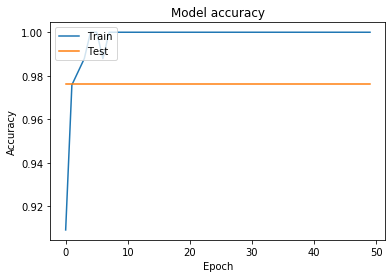

위치-집-아래


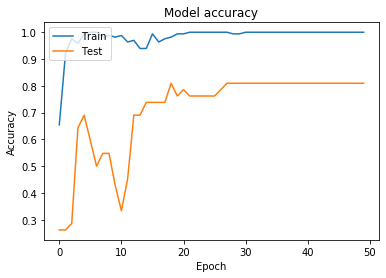

위치-집-정중앙


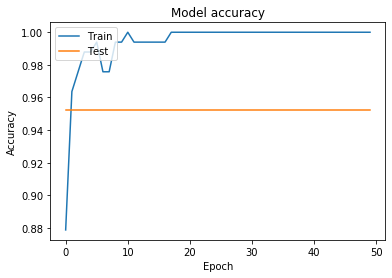

지면선-벽 밑면 있지만 지면 없음


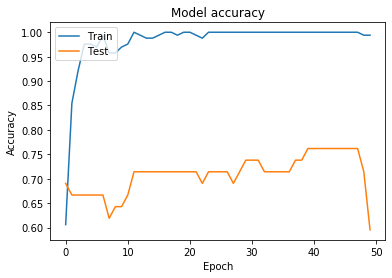

지붕-그물무늬 음영


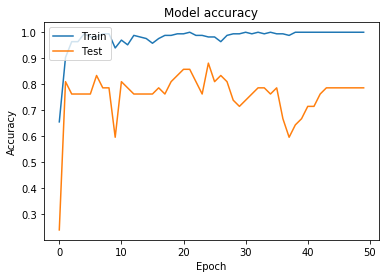

창문-격자무늬


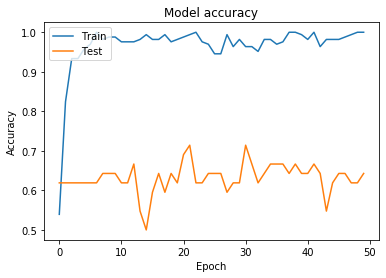

창문-많다


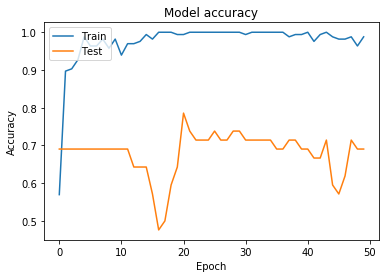

창문-창문을 가린 커튼


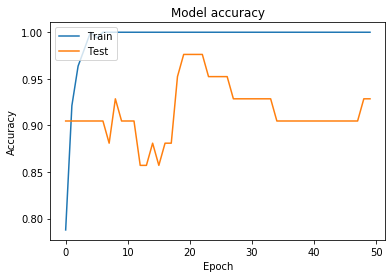

크기-사람-작다


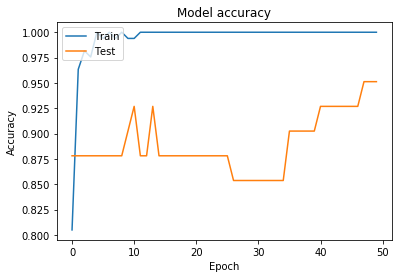

위치-사람-정중앙


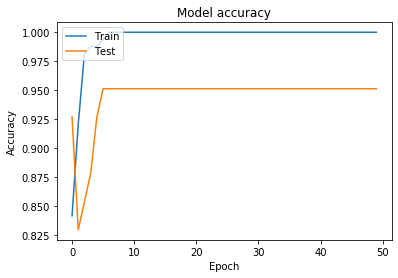

위치-사람-오른쪽


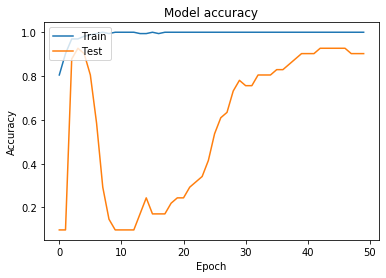

음영-사람-내부의 진한 음영


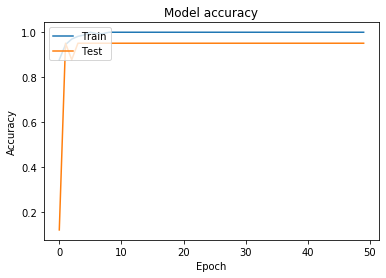

코-작다


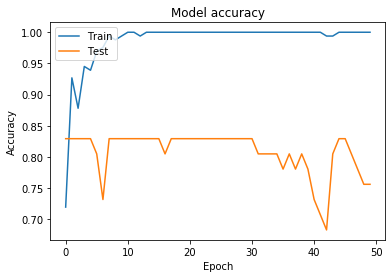

머리카락-윤곽선(검게 표현되지 않은 긴 머리)


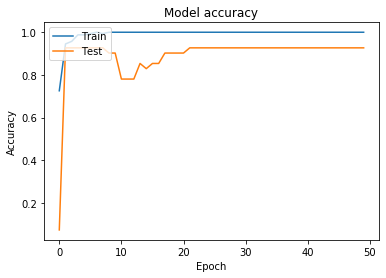

팔-길다


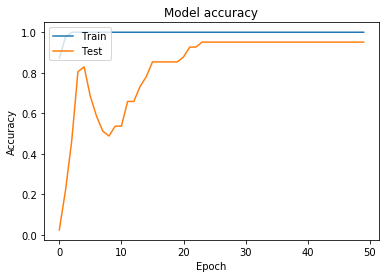

손-원모양 손, 주먹쥔 손


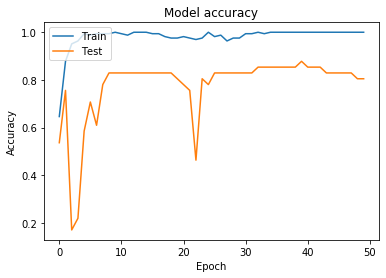

다리-넓게 벌림


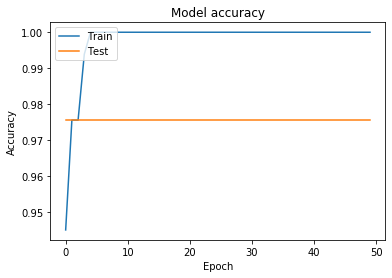

다리-앉아있음


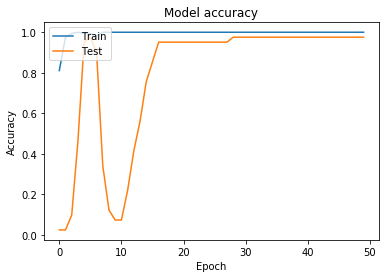

발-발가락 그림


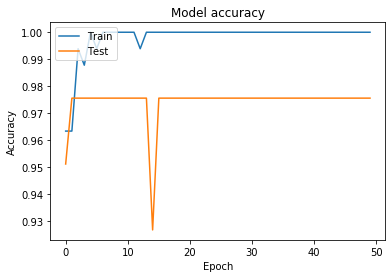

크기-사람-크다


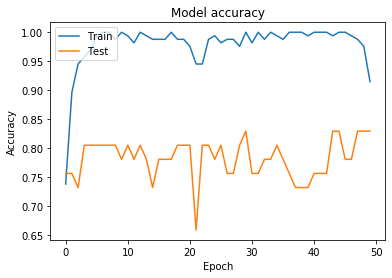

위치-사람-왼쪽


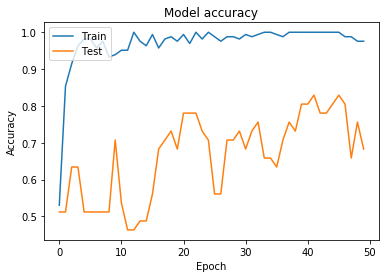

위치-사람-위


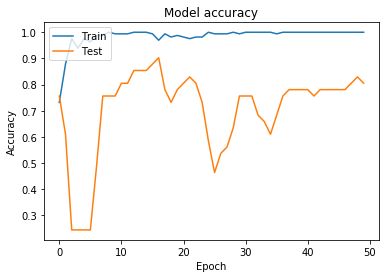

위치-사람-아래


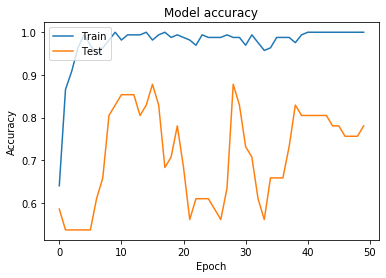

머리-크다


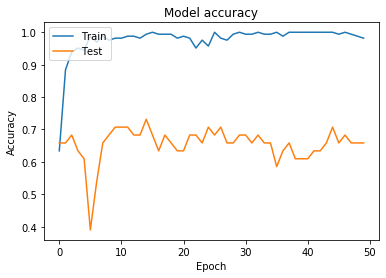

눈-점 혹은 단선의 눈


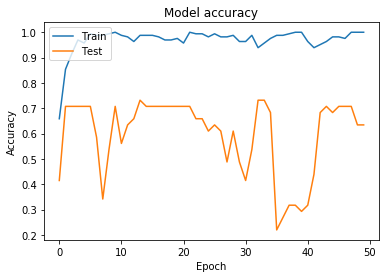

귀-부재


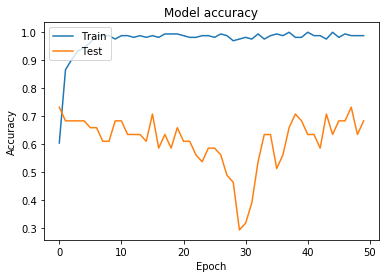

입-웃음


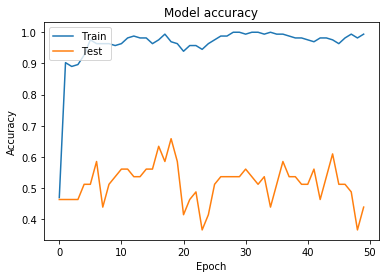

팔-몸에 딱 붙음


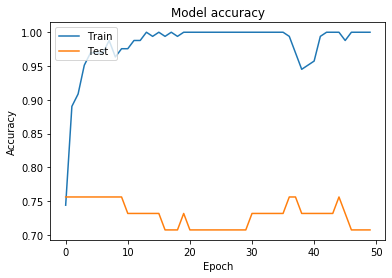

장식-타이, 벨트, 보석


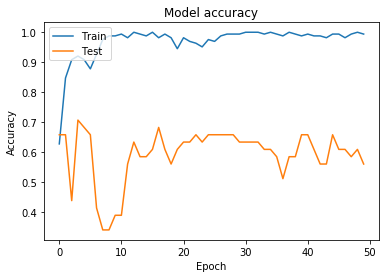

In [15]:
for i in range(len(history)):
    print(feature[i])
    plt.plot(history[i].history['acc'])
    plt.plot(history[i].history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

문-격자무늬 창


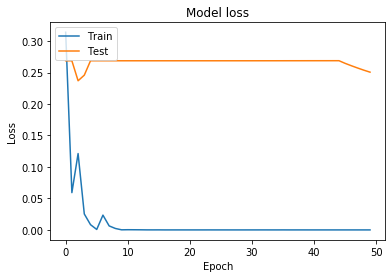

위치-집-아래


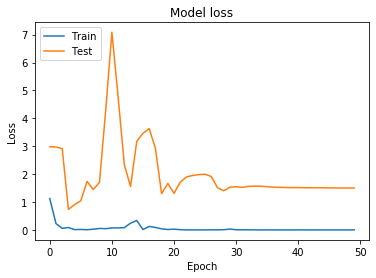

위치-집-정중앙


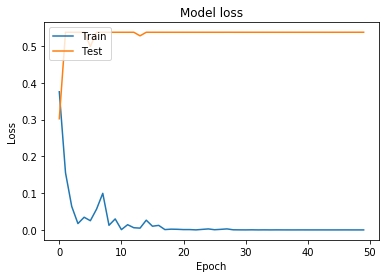

지면선-벽 밑면 있지만 지면 없음


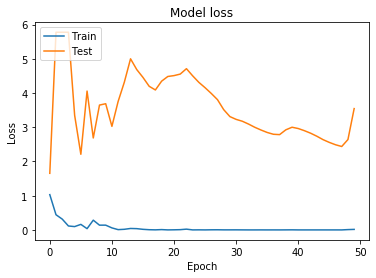

지붕-그물무늬 음영


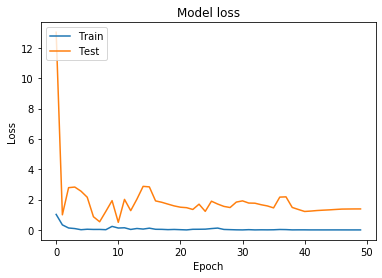

창문-격자무늬


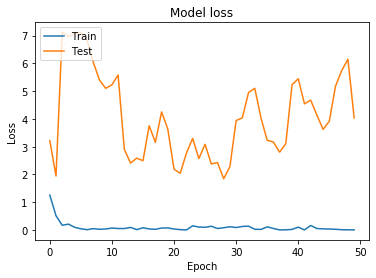

창문-많다


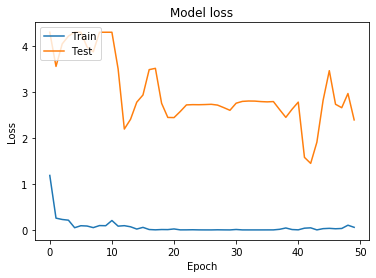

창문-창문을 가린 커튼


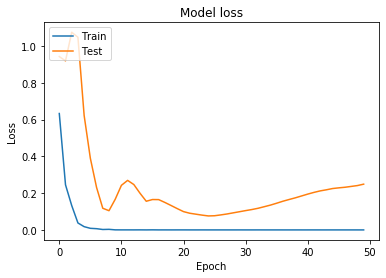

크기-사람-작다


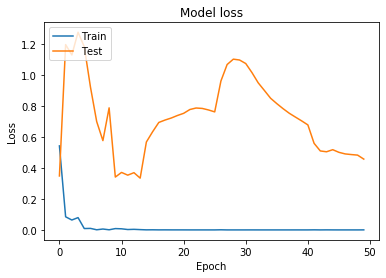

위치-사람-정중앙


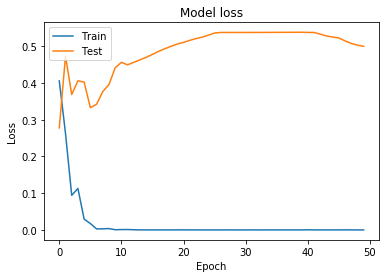

위치-사람-오른쪽


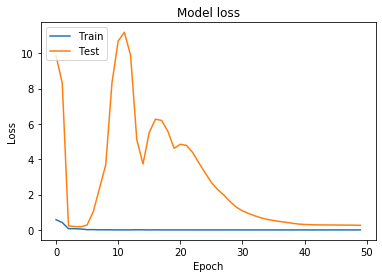

음영-사람-내부의 진한 음영


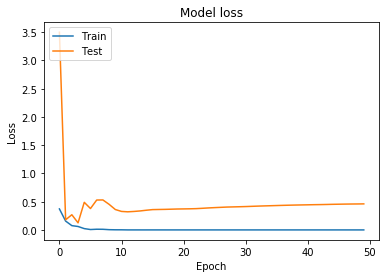

코-작다


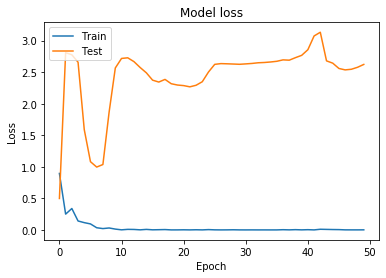

머리카락-윤곽선(검게 표현되지 않은 긴 머리)


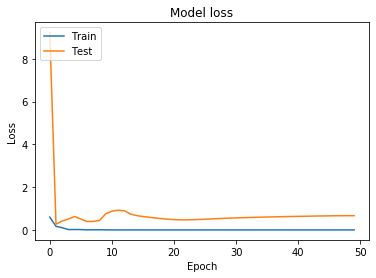

팔-길다


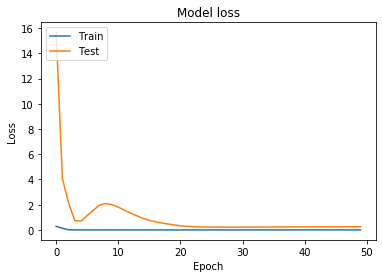

손-원모양 손, 주먹쥔 손


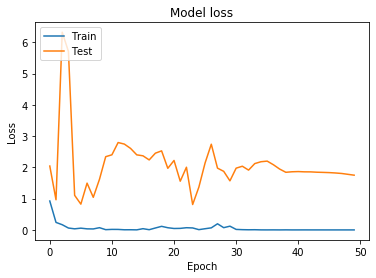

다리-넓게 벌림


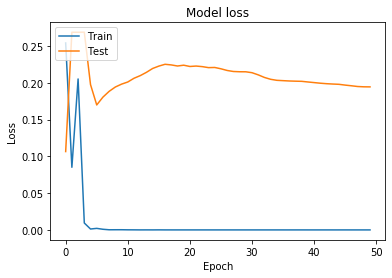

다리-앉아있음


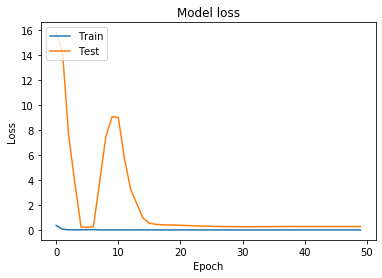

발-발가락 그림


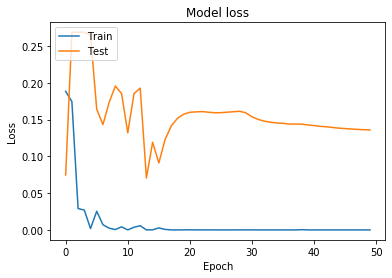

크기-사람-크다


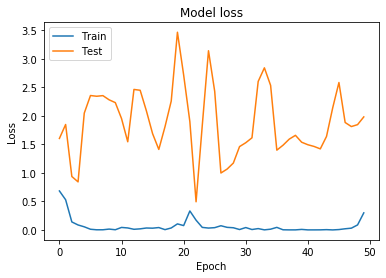

위치-사람-왼쪽


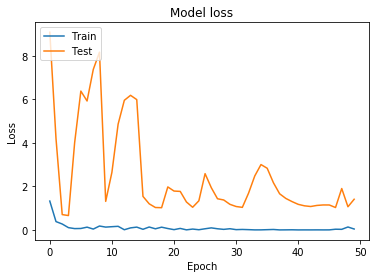

위치-사람-위


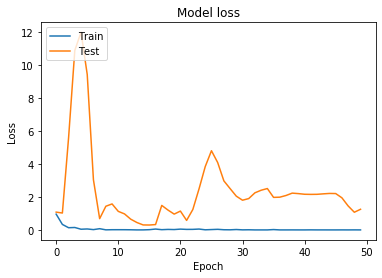

위치-사람-아래


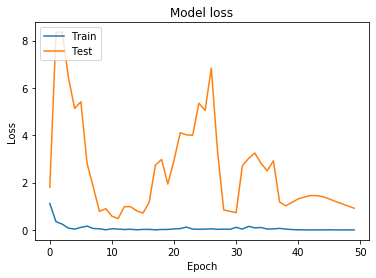

머리-크다


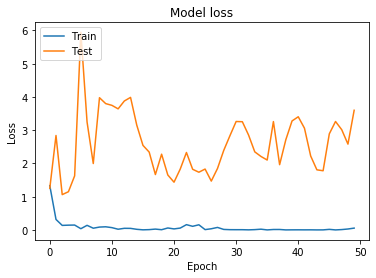

눈-점 혹은 단선의 눈


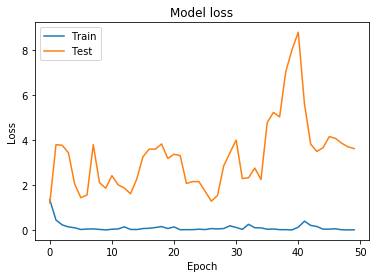

귀-부재


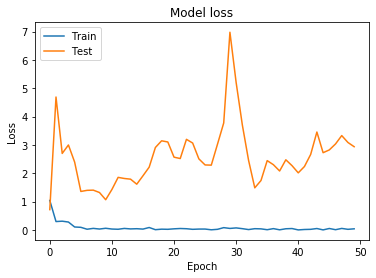

입-웃음


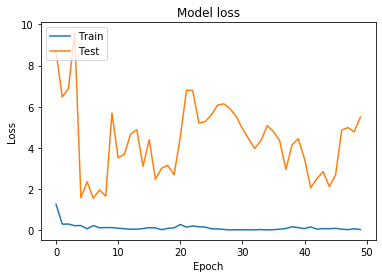

팔-몸에 딱 붙음


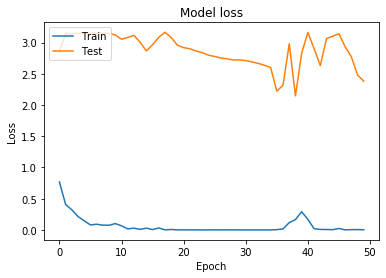

장식-타이, 벨트, 보석


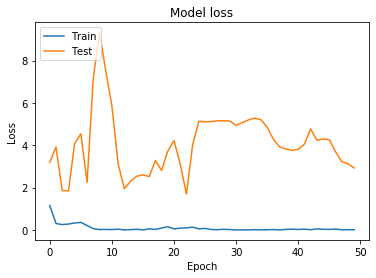

In [16]:
# Plot training & validation loss values
for i  in range(len(feature)):
    print(feature[i])
    plt.plot(history[i].history['loss'])
    plt.plot(history[i].history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [17]:
model_list = []
for num, h in enumerate(feature):
    model_list.append(sorted([i for i in os.listdir() if h in i]))
    print(model_list[num])

['h_문-격자무늬 창_submission.xlsx', '문-격자무늬 창_mobile_model_0.98_0.2369.h5', '문-격자무늬 창_mobile_model_0.98_0.2686.h5']
['h_위치-집-아래_submission.xlsx', '위치-집-아래_mobile_model_0.26_2.9707.h5', '위치-집-아래_mobile_model_0.26_2.9819.h5', '위치-집-아래_mobile_model_0.29_2.9120.h5', '위치-집-아래_mobile_model_0.64_0.7365.h5']
['h_위치-집-정중앙_submission.xlsx', '위치-집-정중앙_mobile_model_0.95_0.3022.h5']
['h_지면선-벽 밑면 있지만 지면 없음_submission.xlsx', '지면선-벽 밑면 있지만 지면 없음_mobile_model_0.69_1.6538.h5']
['h_지붕-그물무늬 음영_submission.xlsx', '지붕-그물무늬 음영_mobile_model_0.24_13.0288.h5', '지붕-그물무늬 음영_mobile_model_0.79_0.5371.h5', '지붕-그물무늬 음영_mobile_model_0.81_0.4993.h5', '지붕-그물무늬 음영_mobile_model_0.81_0.9953.h5', '지붕-그물무늬 음영_mobile_model_0.83_0.8697.h5']
['h_창문-격자무늬_submission.xlsx', '창문-격자무늬_mobile_model_0.62_1.8458.h5', '창문-격자무늬_mobile_model_0.62_1.9441.h5', '창문-격자무늬_mobile_model_0.62_3.2188.h5']
['h_창문-많다_submission.xlsx', '창문-많다_mobile_model_0.64_2.1930.h5', '창문-많다_mobile_model_0.67_1.4466.h5', '창문-많다_mobile_model_0.67_1.5775.h5', '창문-많다_mobi

In [18]:
prediction = []
for i, h in enumerate(feature):
    model = MakeMobileModel()
    model.load_weights(model_list[i][-1])
    test_generator[i].reset()
    print()
    prediction.append(model.predict_generator(
        generator = test_generator[i],
        steps = get_steps(nb_test_samples[i], batch_size),
        verbose=1
        ))


3/3 [==============================] - ETA:  - ETA:  - 1s 419ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 443ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 421ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 437ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 447ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 413ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 415ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 451ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 436ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 427ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 421ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 433ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 412ms/step

3/3 [==============================] - ETA:  - ETA:  - 1s 424ms/step

3/3 [==============

In [19]:
for i, h in enumerate(feature):
    predicted_class_indices=np.argmax(prediction[i], axis=1)
    print(len(predicted_class_indices))
    print('df_test', df_test[i].shape)
    print('prediction' , prediction[i].shape)
    print('='*10)
    # Generator class dictionary mapping
    labels = (train_generator[i].class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]
    submission = pd.read_excel(os.path.join(DATA_PATH,'sub_' + h + '.xlsx'))
    submission[h + "_class"] = predictions
    print(submission.head(10))
    submission.to_excel("h_" + h + "_submission.xlsx", index=False)
    print('='*20)

90
df_test (90, 1)
prediction (90, 2)
   Unnamed: 0        data  문-격자무늬 창 문-격자무늬 창_class
0          60  0104_H.jpg         0              0
1         271  0498_H.jpg         0              0
2          22  0038_H.jpg         0              0
3         102  0196_H.jpg         0              0
4         109  0203_H.jpg         0              0
5          74  0123_H.jpg         0              0
6          84  0156_H.jpg         0              0
7          45  0076_H.jpg         0              0
8         246  0464_H.jpg         0              0
9          62  0107_H.jpg         0              0
90
df_test (90, 1)
prediction (90, 2)
   Unnamed: 0        data  위치-집-아래 위치-집-아래_class
0         233  0444_H.jpg        0             0
1          14  0023_H.jpg        0             0
2         152  0287_H.jpg        1             0
3          43  0073_H.jpg        1             0
4          28  0046_H.jpg        1             0
5          94  0184_H.jpg        1             1
6          40  0068_

9         228  0441_P.jpg     0          0
89
df_test (89, 1)
prediction (89, 2)
   Unnamed: 0        data  머리카락-윤곽선(검게 표현되지 않은 긴 머리)  \
0         265  0498_P.jpg                          0   
1         143  0263_P.jpg                          0   
2          21  0039_P.jpg                          0   
3          79  0135_P.jpg                          0   
4         175  0336_P.jpg                          0   
5          44  0074_P.jpg                          1   
6           3  0004_P.jpg                          0   
7          15  0029_P.jpg                          0   
8          64  0102_P.jpg                          1   
9         267  0500_P.jpg                          0   

  머리카락-윤곽선(검게 표현되지 않은 긴 머리)_class  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
5                               0  
6                               0  
7             

9         280  0518_P.jpg     0          0
89
df_test (89, 1)
prediction (89, 2)
   Unnamed: 0        data  입-웃음 입-웃음_class
0         250  0471_P.jpg     0          0
1         268  0502_P.jpg     0          0
2         263  0494_P.jpg     1          1
3         199  0393_P.jpg     1          0
4         238  0453_P.jpg     0          1
5         282  0520_P.jpg     1          1
6         242  0459_P.jpg     0          0
7         219  0420_P.jpg     1          0
8          70  0113_P.jpg     1          0
9         104  0190_P.jpg     0          0
89
df_test (89, 1)
prediction (89, 2)
   Unnamed: 0        data  팔-몸에 딱 붙음 팔-몸에 딱 붙음_class
0         267  0500_P.jpg          0               0
1         290  0529_P.jpg          0               0
2         256  0479_P.jpg          1               0
3         106  0194_P.jpg          1               0
4          48  0079_P.jpg          0               0
5          33  0059_P.jpg          1               0
6         263  0494_P.jpg          0 

## Confusion Matrix & f1_score 함수 정의

In [20]:
from sklearn.metrics import f1_score,confusion_matrix

def micro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    font = {'family': 'NanumGothic', 'color':  'blue', 'weight': 'light', 'size': 12}

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax

문-격자무늬 창  :  0.9666666666666667
Confusion matrix, without normalization
[[87  0]
 [ 3  0]]


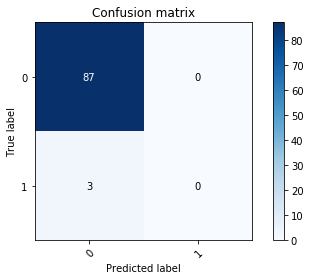

위치-집-아래  :  0.6888888888888889
Confusion matrix, without normalization
[[53 14]
 [14  9]]


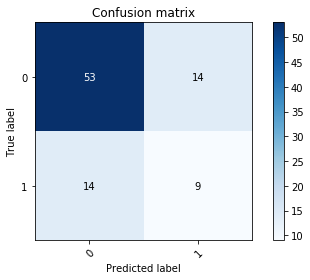

위치-집-정중앙  :  0.9444444444444444
Confusion matrix, without normalization
[[85  0]
 [ 5  0]]


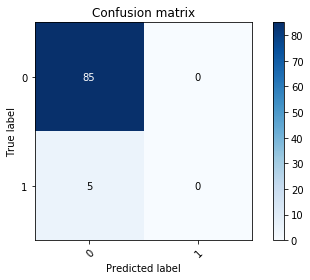

지면선-벽 밑면 있지만 지면 없음  :  0.6555555555555556
Confusion matrix, without normalization
[[ 0 31]
 [ 0 59]]


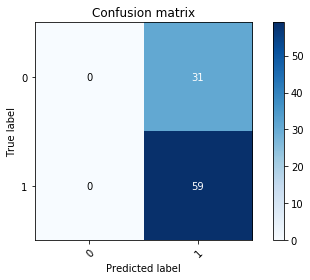

지붕-그물무늬 음영  :  0.8222222222222222
Confusion matrix, without normalization
[[65  3]
 [13  9]]


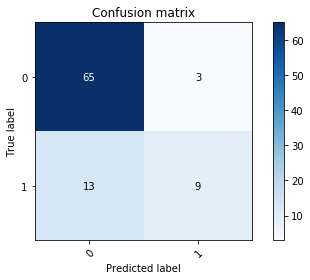

창문-격자무늬  :  0.6111111111111112
Confusion matrix, without normalization
[[ 0 35]
 [ 0 55]]


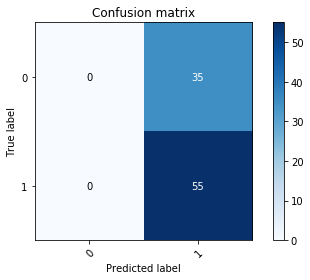

창문-많다  :  0.6888888888888889
Confusion matrix, without normalization
[[62  0]
 [28  0]]


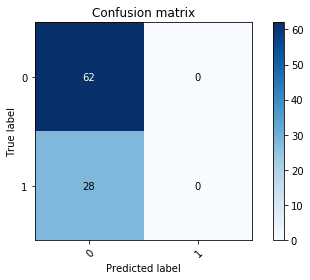

창문-창문을 가린 커튼  :  0.8222222222222222
Confusion matrix, without normalization
[[72 10]
 [ 6  2]]


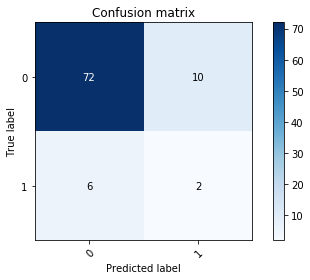

크기-사람-작다  :  0.8539325842696629
Confusion matrix, without normalization
[[71  8]
 [ 5  5]]


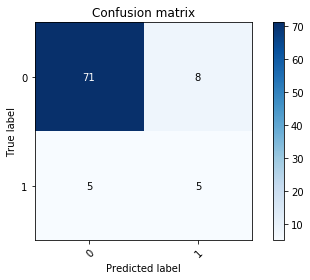

위치-사람-정중앙  :  0.898876404494382
Confusion matrix, without normalization
[[80  5]
 [ 4  0]]


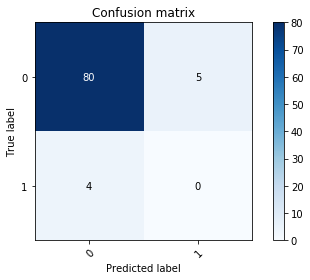

위치-사람-오른쪽  :  0.8876404494382022
Confusion matrix, without normalization
[[79  2]
 [ 8  0]]


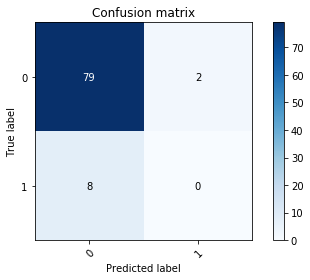

음영-사람-내부의 진한 음영  :  0.9213483146067416
Confusion matrix, without normalization
[[82  3]
 [ 4  0]]


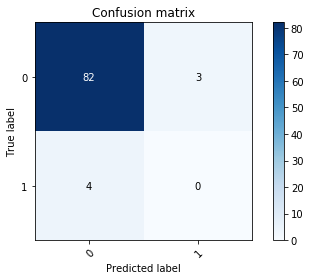

코-작다  :  0.7303370786516854
Confusion matrix, without normalization
[[64 10]
 [14  1]]


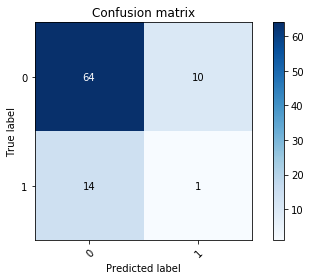

머리카락-윤곽선(검게 표현되지 않은 긴 머리)  :  0.898876404494382
Confusion matrix, without normalization
[[80  3]
 [ 6  0]]


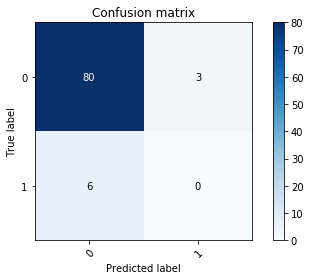

팔-길다  :  0.9438202247191011
Confusion matrix, without normalization
[[84  4]
 [ 1  0]]


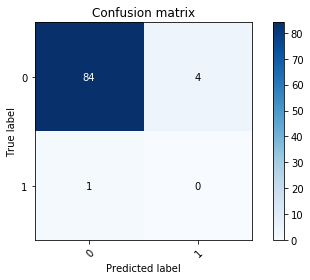

손-원모양 손, 주먹쥔 손  :  0.7640449438202248
Confusion matrix, without normalization
[[63 12]
 [ 9  5]]


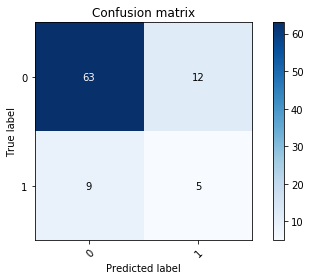

다리-넓게 벌림  :  0.9662921348314607
Confusion matrix, without normalization
[[86  1]
 [ 2  0]]


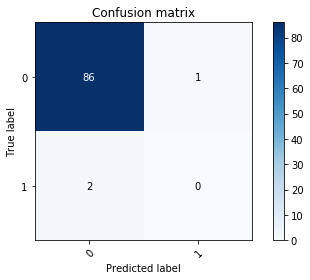

다리-앉아있음  :  0.9775280898876404
Confusion matrix, without normalization
[[87  0]
 [ 2  0]]


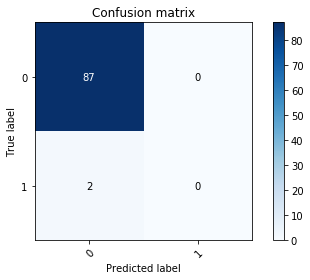

발-발가락 그림  :  0.9775280898876404
Confusion matrix, without normalization
[[87  0]
 [ 2  0]]


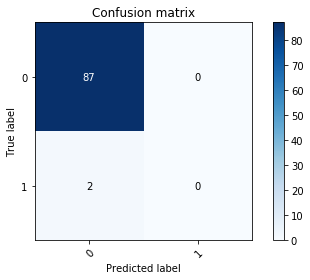

크기-사람-크다  :  0.8764044943820225
Confusion matrix, without normalization
[[62  4]
 [ 7 16]]


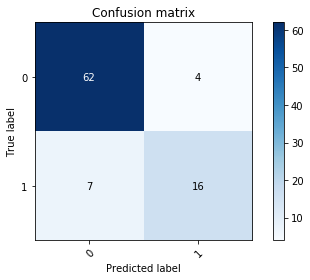

위치-사람-왼쪽  :  0.5168539325842697
Confusion matrix, without normalization
[[22 20]
 [23 24]]


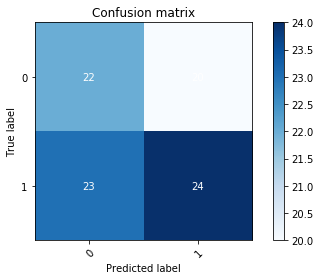

위치-사람-위  :  0.7640449438202248
Confusion matrix, without normalization
[[62  5]
 [16  6]]


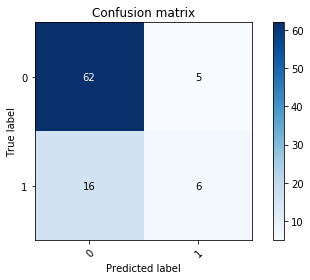

위치-사람-아래  :  0.842696629213483
Confusion matrix, without normalization
[[31 11]
 [ 3 44]]


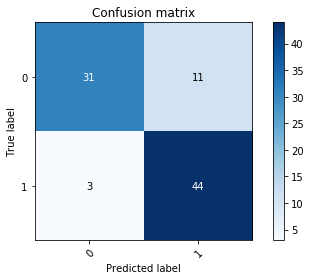

머리-크다  :  0.6853932584269663
Confusion matrix, without normalization
[[55  3]
 [25  6]]


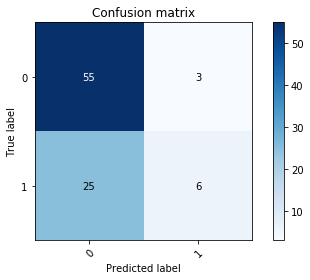

눈-점 혹은 단선의 눈  :  0.449438202247191
Confusion matrix, without normalization
[[20 43]
 [ 6 20]]


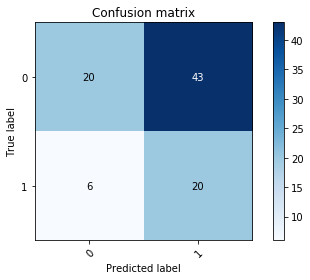

귀-부재  :  0.651685393258427
Confusion matrix, without normalization
[[47 13]
 [18 11]]


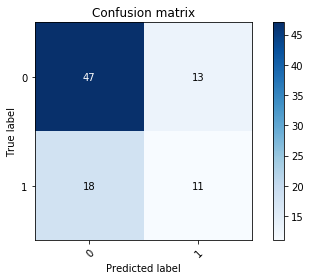

입-웃음  :  0.5617977528089888
Confusion matrix, without normalization
[[42  5]
 [34  8]]


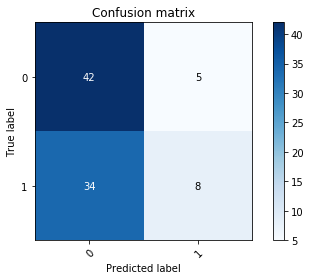

팔-몸에 딱 붙음  :  0.752808988764045
Confusion matrix, without normalization
[[67  0]
 [22  0]]


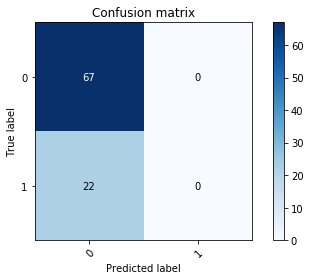

장식-타이, 벨트, 보석  :  0.7078651685393259
Confusion matrix, without normalization
[[58  2]
 [24  5]]


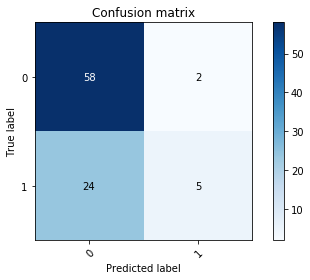

In [23]:
# def micro_f1(y_true, y_pred):
#     return f1_score(y_true, y_pred, average='micro')

for h in feature:
    try:
        submission = pd.read_excel("h_"+h+"_submission.xlsx")
        print(h , " : " , micro_f1(submission[h],submission[h+ '_class']))
        plot_confusion_matrix(submission[h],submission[h+'_class'], classes=[0,1], title='Confusion matrix')
#         plot_confusion_matrix(submission[h],submission[h+'_class'], classes=[0,1], normalize=True, title='Normalize Confusion matrix')
    except Exception:
        print(e)
    
    

In [ ]:
# h = feature
def ConfusionMatrix(excel, h):
    TP, FN, FP, TN = 0, 0, 0, 0
    actual = excel[h]
    predicted = excel[h +'_class']
   
    for i in range(len(excel)):
        #print(type(actual[i]), type(predicted[i]))
        #print(actual[i], predicted[i])
        if(actual[i] == predicted[i]):
            if(actual[i] == 1):
                TP = TP + 1
            else:
                TN = TN + 1
        else:
            if(actual[i] == 1):
                FN = FN + 1
            else:
                FP = FP + 1
    FN = len(actual) - TP
    TN = len(predicted) - FP
    
    precision = TP / (TP + FP)
    neg_pred = TN / (TN + FN)
    sensi = TP / (TP + FN)
    spec = TN / (TN + FP)
    Accu = (TP+TN) / (TP+TN+FP+FN)
    
    return TP,FP,FN,TN,precision,neg_pred, sensi, spec, Accu     

In [ ]:
bestfeature = ['위치-집-아래',
              '지면선-벽 밑면 있지만 지면 없음',
              '지붕-그물무늬 음영']

In [11]:
for h in bestfeature:
    excel = pd.read_excel("./bestfeature/h_"+h+"_submission.xlsx")
    TP, FP, FN, TN, precision, neg_pred, sensi, spec, Accu = ConfusionMatrix(excel, h)
    print(h, '- confusion Matrix')
    print('='*20)
    print('actual : ', len(excel[h]))
    print('predictive : ', len(excel[h + '_class']))
    print('True Positive(TP) : ', TP)
    print('False Positive(FP) : ', FP)
    print('False Negative(FN) : ', FN)
    print('True Negative(TN) : ', TN)
    print('precision : ', precision)
    print('negatuve_predictive_value : ', neg_pred)
    print('sensitivity : ', sensi)
    print('specificity : ', spec)
    print('Accuracy : ', Accu)
    print("f1 score : " , micro_f1(excel[h],excel[h+ '_class']))
    print('='*40)

위치-집-아래 - confusion Matrix
actual :  90
predictive :  90
True Positive(TP) :  15
False Positive(FP) :  16
False Negative(FN) :  75
True Negative(TN) :  74
precision :  0.4838709677419355
negatuve_predictive_value :  0.4966442953020134
sensitivity :  0.16666666666666666
specificity :  0.8222222222222222
Accuracy :  0.49444444444444446
f1 score :  0.7333333333333333
지면선-벽 밑면 있지만 지면 없음 - confusion Matrix
actual :  90
predictive :  90
True Positive(TP) :  49
False Positive(FP) :  18
False Negative(FN) :  41
True Negative(TN) :  72
precision :  0.7313432835820896
negatuve_predictive_value :  0.6371681415929203
sensitivity :  0.5444444444444444
specificity :  0.8
Accuracy :  0.6722222222222223
f1 score :  0.6888888888888889
지붕-그물무늬 음영 - confusion Matrix
actual :  90
predictive :  90
True Positive(TP) :  17
False Positive(FP) :  6
False Negative(FN) :  73
True Negative(TN) :  84
precision :  0.7391304347826086
negatuve_predictive_value :  0.535031847133758
sensitivity :  0.18888888888888888
s